<img src="OHR_Logo.png">

### in partnership with:

<img src="CAL_Logo.png">

# Employee Resignation Predictive Modeling

## Knowledge Transfer Documentation

## MSBA 6515: Capstone Project in Analytics

- <b>Semester</b>: <i>Summer 2020</i>
- <b>CAL Team</b>: <i># 1</i>
- <b>Authors</b>: Kevin Grady, Wendy Lu, Anthony Meyers, Danny Moncada, Claire Ryan, and Jonathan Watkins

**August 17, 2020**

## 1. Overview

### 1.1 Background & Context

Employee turnover is a significant problem for organizations, as it is difficult to predict when employees will resign and often can introduce noticeable voids in an organization’s workforce. As a result, it is imperative that organizations formulate proper recruitment, acquistion, and retention strategies, as well as implementing effective mechanisms for preventing and diminishing the impact of employee turnover, while understanding its underlying root causes.

### 1.2 Problem Statement

The Office of Human Resources at the University of Minneosta is looking to leverage machine learning & predictive modeling to predict (with a two month lead time) which full-time salaried faculty and professional employees have the <i>highest</i> probability of resigning.  The end goal of building a robust predictive model is to help HR leaders in each unit identify their employees who are most likely to resign in order to have intervention conversations and thereby increase the overall retention rate for their units and the University overall.

### 1.3 Data Sources

For this project, there were many data sets provided by the Office of Human Resources in the form of comma separated files (CSV). Here is an overview of each of the tables:

* D_EEO_AVAIL (Dimension - EEO Availability Data)
* D_HR_CMM_PERS (Dimension - HR Common Person Data)
* D_HR_ORG (Dimension - HR Department Hierarchy Data)
* D_POS (Dimension - Position Data)
* D_UM_EMP (Dimension - Employee Historical Data)
* Data Lineage (Mappings of physical column names to definitions)
* F_EMP_ADDL_PAY (Fact - Additional Pay Data)
* F_EMP_CMPNT_PAY (Fact - Components of Pay Data)
* F_EMP_COMP (Fact - Normalized Pay Rates Data)
* F_EMP_HC_FTE (Fact - Headcount and FTE Data)
* F_EMP_WKFC_ACTN (Fact - Workforce Actions Data)

<img src="Data Files.png">

No external data sources were utilized by the project team during the course of the project; all of the analysis henceforth was done strictly with the data provided by OHR and the PJC Scrum team.

## 2.  Technical Specifications

### 2.1  Enivornment Details

In [2]:
## Show the R environment details
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows Server x64 (build 14393)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.6.1  IRdisplay_0.7.0 pbdZMQ_0.3-3    tools_3.6.1    
 [5] htmltools_0.5.0 base64enc_0.1-3 crayon_1.3.4    uuid_0.1-2     
 [9] IRkernel_0.8.15 jsonlite_1.6    digest_0.6.18   repr_0.19.2    
[13] rlang_0.3.4     evaluate_0.14  

In [115]:
## For plotting distributions
%matplotlib inline

## System env
import sys
## Data Cleaning
import pandas as pd
import numpy as np
import re
## For Date Time Manipulation
from datetime import datetime, timedelta
import datetime as dt
from dateutil.parser import parse
## Plotting
import matplotlib.pyplot as plt
import matplotlib
## Import the ML libraries
import sklearn
import scikitplot as skplt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score, roc_curve, precision_recall_curve, make_scorer, precision_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
import pysurvival
import lifelines
import graphviz
## Because GraphViz sucks, we have to import a bin file to view the tree graph
import os
os.environ["PATH"] += os.pathsep + "D:\\Shared Group Folder\\bin"

In [117]:
## Show the Python environment details
print("Here are the environment details...")
print()
print(sys.executable)
print(sys.version)
print(sys.version_info)

## Show the different versions for each library used in the Python exploration
print()
print("This notebook is using Pandas version: {}.".format(pd.__version__))
print("This notebook is using Numpy version: {}.".format(np.__version__))
print("This notebook is using Matplotlib version: {}.".format(matplotlib.__version__))

print()
print("Here are the machine learning libraries:")
print("This notebook is using Scikit-learn version: {}.".format(sklearn.__version__))
print("The following algorithms are a part of the sklearn package: Logistic Regression, k-Nearest Neighbor, Decision Tree, Random Forest, Support Vector Machine.")
print("This notebook is using XGBoost version: {}.".format(xgb.__version__))
print("This notebook is using LightGBM version: {}.".format(lgb.__version__))
print("This notebook is using Scikit-plot version: {}.".format(skplt.__version__))
print("This notebook is using Lifelines version: {}.".format(lifelines.__version__))
print("This notebook is using PySurvival version: {}.".format(pysurvival.__version__))
print("This notebook is using Graphviz version: {}.".format(graphviz.__version__))

Here are the environment details...

C:\Python\python.exe
3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)

This notebook is using Pandas version: 1.0.5.
This notebook is using Numpy version: 1.18.5.
This notebook is using Matplotlib version: 3.2.2.

Here are the machine learning libraries:
This notebook is using Scikit-learn version: 0.23.1.
The following algorithms are a part of the sklearn package: Logistic Regression, k-Nearest Neighbor, Decision Tree, Random Forest, Support Vector Machine.
This notebook is using XGBoost version: 0.90.
This notebook is using LightGBM version: 2.3.1.
This notebook is using Scikit-plot version: 0.3.7.
This notebook is using Lifelines version: 0.24.13.
This notebook is using PySurvival version: 0.2.1.
This notebook is using Graphviz version: 0.14.


### 2.2 Software & Tools

In addition to R and Python programming languages, the following software was utilized:

* Jupyter Notebooks (code development)
* GitHub (repository for storing code)
* Tableau Desktop (data visualization)

## 3. Methodology & Solution Overview
For this project, several well known supervised machine learning algorithms and statistical models were used. In this section we will provide a brief overview of the theory behind the algorithms. 

## **Classification Models**

### 3.1 Extreme Gradient Boosting (XGB)

https://xgboost.readthedocs.io/en/latest/index.html

Extreme Gradient Boosting is a tree-based method introduced in 2014 by Tianqi Chen, and is known simply as XGBoost. It is scalable and highly accurate, designed for optimizing computational speed and model performance. One of its main improvements is the use of regularization to reduce overfitting, which yields better predictions and much faster computational run times. 

### 3.2 Logistic Regression (LR)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Logistic Regression is a traditional classification algorithm involving linear discriminants. The primary output from the algorithm is a probability that a given input point belongs to a certain class. Based on the value of that probability, the model creates a linear boundary to separate the classes. Due to to ease of implementation and the fact that it works well on linearly separable classes, it is one of the most widely used classifiers. 

### 3.3 K-Nearest Neighbors (KNN)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

K-nearest neighbors is a non-parametric (makes no assumptions about the distribution of data) used for classification and regression. For classification, the algorithm identifies K data points in training data that are closest to the new instance and classify this new instance by using a majority vote of its K neighbors. In practice, the three most popular distance metrics are the Euclidean, Manhattan, and Minkowski distance. KNN is best used with a small number of features and struggles when feature dimensions increase. 

### 3.4 Decision Tree (DT)

https://scikit-learn.org/stable/modules/tree.html#classification

Decision trees are supervised learning methods building classification models in a “tree-like” structure. The benefits to decision tree method are four-fold: (1) conceptually very easy to understand but powerful; (2) intuitive for interpretation; (3) capable of handling missing values and mixed features; and (4) able to select variables automatically. However the algorithm does have many limitations, including insability with high model variance and small variations in the training data can have a large effect on the overall tree structure. 

### 3.5 Random Forest (RF)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Random forests take an ensemble approach that provides an improvement of a basic decision tree structure by combining a group of “weak” learners to form a stronger learner. The algorithm utilizes a “divide-and-conquer” approach to improve performance; its methodology is to build a number of decision trees (i.e. weak learners) on boostrapped training sets, and a random sample of m predictors are chosen as split candidates from the full set of P predictors for each decision tree. As m approaches P, the majority or predictors are not considered, and therefore the individual trees will not be dominated by a few influential features. 

### 3.6 Support Vector Machines (SVM)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Support vector machines are commonly used as discriminative classififers to assign new data samples to one of two possible categories. The basic idea of SVM is defining a hyperplane which separates the n-dimensional data into two classes, where the hyperplane maximizes distance to the nearest data points; these are called “support vectors”. SVMs will often yield similar results to logistic regression if the decision boundaries are linear. 

### 3.7 LightGBM (LGB)

https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

LightGBM is another gradient boosting framework using tree based learning algorithms, similar to XGBoost. It is designed to be efficient and comes with many advantages, including faster training speed, lower memory usage, better accuracy, parallel learning, and the capability to handle large-scale data. How it acheives this is by using histogram-based algorithms which bucket continuous feature values into discrete bins, speeding up the training process and reducing memory usage. Another differentiator for the algorithm is that it grows trees leaf-wise (best-first), will “fit” trees and determine which employees it did not classify with great enough precision, giving those employees higher weights during the next training cycle; it will iterate through this process thousands of times to get the best possible separation of active vs. resigned employees.

## **Time-to-Event Models**

### 3.8 Kaplan Meier
The Kaplan-Meier estimator of the survival function, otherwise referred to as the product limit estimator incorporates information from all observations available, both uncensored (event times) and censored. This is achieved by considering survival to any point in time as a series of steps defined at the observed survival and censored times. The observed data is then used to estimate the conditional probability of confirmed survival at each observed survival time. We can then multiply them to obtain an estimate of the overall survival function. 

### 3.9 Cox Proportional Hazard Regression Model
The Cox proportional hazard model allows us to simultaneously assess the relationship between our covariates and the survival time of employees. This is accomplished by evaluating very small intervals of time that contain at most one resignation(i.e., event) to determine the rate at which resignations occurr at a particular point in time, otherwise referred to as the hazard rate. The hazard rate itself is a part of a larger equation referred to as the hazard function, which analyzes teh likelihood that an individual will survive (i.e., not resign) at a certain point in time based on survival during an earlier time. Ultimately, the Cox model uses gradient descent to maximize the partial likelihood of the weights associated with our hazard function. 

### 3.10 Conditional Survival Forest
Survival forest models are designed to allow us to work recursively to divide our covariate space to identify similar individuals according to the time-to-event outcome. Homogeneity (i.e., similarity) is obtained by minimizing our impurity measure. This step is extremely important for conditional forest models because they are “formulated in such a way that [they] seperate the algorithm for selecting the best splitting covariate from the algorithm for selecting the best split point.”[1] In contrast to the Cox Proportional Hazard model, conditional survival forest models are completely non-parametric, and much better positioned to handle sparse data. 

## 4. Data Engineering

### 4.1 Data Extraction

For the sake of brevity, we will only showcase examples of the data extraction and data preprocessing steps.  The full notebooks containing all the code are located in the Section 9 Appendix.

For the "final" flattened table generation process, we load these CSV files into Python dataframes:

* D_UM_EMP
* D_HR_CMM_PERS
* F_EMP_HC_FTE
* F_EMP_CMPNT_PAY
* D_HR_ORG

In [ ]:
## Load in the employee dimension table
## We use low_memory = False because it is mixed data types
d_um_emp_df = pd.read_csv(team_folder + d_um_emp, low_memory = False)

## Load the HR Common Person table
d_hr_cmm_pers_df = pd.read_csv(team_folder + d_hr_cmm_pers, encoding = "ISO-8859-1")

## Load the fact table
f_emp_hc_fte_df = pd.read_csv(team_folder + f_emp_hc_fte, dtype = {"EMPLID": "str"})

## Pull in the Pay Component dataframe
## Only include the fields that are needed
f_emp_cmpnt_pay_df = pd.read_csv(team_folder + f_emp_cmpnt_pay, low_memory = False, dtype = {"EMPLID": "str"})

## Load in the employee dimension table
## We use low_memory = False because it is mixed data types
d_hr_org_df = pd.read_csv(team_folder + d_hr_org, encoding = "ISO-8859-1")

### 4.2 Employee Population Filters

Per the requirement of focusing on full-time, salaried professional staff and faculty employees, the following filters were applied to limit the data set to the correct population:

* Employee Status Codes: A, L, P, W (Active Employees)
* Full-time, salaried employees & exception hourly (<i>EMP_PYMNT_TP_DESC</i> = Salaried, Exception Hourly)
* Job Code Groups: Civil Service, Professional & Administrative, Labor Represented, and Faculty job groups. (<i>JOBCD_GRP_CD</i> = AA,AP,CS,FA,LR)
* Paygroups: P12, P10, and P09 (<i>PAY_GRP_CD</i> = P12, P10, P09)
* 75% time and above (<i>FTE_CNT</i> >= .75)
* Predicting departures from the University entirely (not internal transfers) (<i>UNIV_TRMN_DT</i> != NULL)
* Predicting employees who resigned (<i>WKFC_ACTN_RSN_LD</i> = Resignation AND <i>WKFC_ACTN_RSN_LD</i> != Entered in Error)

In [ ]:
## Filter on A - Active, L - Leave of Absence, P - Leave With Pay, W - Short Work Break
## Removes D - Deceased, S - Suspended, R - Retired, T - Terminated
emp_sts_cds = ["A", "L", "P", "W"]

## Job Groups, Paygroups, Payment types
jobcd_grp_codes = ["AA", "AP", "CS", "FA", "LR"]
paygroups = ["P12", "P10", "P09"]
payment_types = ["Salaried", "Exception Hourly"]

## Filter the target dataframe
## Don't filter on STATUS CODES!  Remember, we want to see who made it through the life time of the employees
## We will mark the emplids who 'Resigned' and that's our target

employees_target_df = employees_target_df[employees_target_df["JOBCD_GRP_CD"].isin(jobcd_grp_codes)]
employees_target_df = employees_target_df[employees_target_df["PAY_GRP_CD"].isin(paygroups)]
employees_target_df = employees_target_df[employees_target_df["EMP_PYMNT_TP_DESC"].isin(payment_types)]
employees_target_df = employees_target_df[employees_target_df['FTE_CNT']>=0.75]

## Add in the appropriate status codes
## A, L, P, W plus T = Termination, D = Deceased, R = Retired
add_term_code = emp_sts_cds + ['T'] + ['R']

## Bring in deceased
##add_term_code = emp_sts_cds + ['T'] + ['R'] + ['D']
## Find employees with Resignation action reason

emp_pop_current_df = emp_pop_current_df[emp_pop_current_df["EMP_STS_CD"].isin(add_term_code)]

## Add in the University Termination Date to ensure employees churned
emp_pop_current_df = emp_pop_current_df.merge(univ_terms, how = "left", on = ["EMPLID"])

## For all of the employees with a Termination or Resignation reason code that is not EIE - Entered in Error, 
## give them the 1.  All Active Employees get a 0.
emp_pop_current_df["TARGET"] = np.where((emp_pop_current_df["WKFC_ACTN_CD"].isin(["TER", "RET"])) 
                                        & (emp_pop_current_df["WKFC_ACTN_RSN_CD"] != "EIE"), 1, 0)

## Remove all other Termination Rows that are NOT Resignation as a final clean up
emp_pop_current_df = emp_pop_current_df.drop(emp_pop_current_df[(emp_pop_current_df["TARGET"] == 0) 
                                                                & (emp_pop_current_df["EMP_STS_CD"] == 'T')].index)

### 4.3 Data Preprocessing

The following steps were taken to preprocess the data and "flatten" the table structure in prep for the classification models:

1.  Set prediction and target date
2.  Pull out specific columns from Employee dimension for feature engineering
3.  Convert date fields and fix parsing errors (due to future dated rows in Employee dimension)
4.  Create two data sets, one with all of the active employees at the beginning of the time period, one with all active and terminated employees from the end of the time period
5.  "Flatten" the table by `merging` the two datasets using the Natural Key SIDS (NKSIDS) to ensure we're capturing the same job rows across the timeline (picture illustrating timelines below)

<img src="Table Flattening.png">

In [ ]:
## Function calls
def get_fact_curr_rows(date=None, df=f_emp_hc_fte_df):
    '''
    Filters the head count or pay data frame to current rows based on a given date.
    
    Inputs: df = head count fact or pay fact data frame, date = date for which the current rows should be returned.
    '''
    
def get_historical_df(df, df2, date):
    
    '''
    Grabs all rows before prediction date for employees we are running the predictions on. 
    
    Inputs: 
        df: flattened employee data frame (one row per EMPLID: output of get_pred_emps function)
        df2: complete, unfiltered df of employee dim table (d_um_emp_df)
        date: prediction date, in datetime object format. Data will be filtered to any actions occuring before this date. 
            
    Outputs: historical data frame of all rows for EMPLIDs in the flattened data frame.
    '''
    
def get_current_all_jobs(df, df2, df3, date=None):
    '''
    Gets all rows from the employee dim that are current as of prediction date for all EMPLIDs we are making predictions on.
    Filters to ONLY jobs in the AA, AP, CS, LR categories, and active status codes, with FTE_CNT > 0.
    Will return one row per EMPLID if employee only holds one job, but multiple rows per EMPLID if employee holds multiple concurrent jobs.
    
    Inputs: 
        df: flattened employee data frame (one row per EMPLID: output of get_pred_emps function)
        df2: complete, unfiltered df of employee dim table (d_um_emp_df)
        df3: head count data frame
        date: prediction date, in datetime object format. Data will be filtered to any actions occuring before this date. 
            
    Outputs: data frame with rows for all current jobs at the prediction date for EMPLIDs in the flattened data frame.
    '''
    

def get_flat_emps(df, df2, date=None):
    '''
    Get flattened employee data frame, using primary job as the row we keep (if multiple jobs). 
    If no job is listed as primary (data source issue), that employee will be dropped.
    
    Inputs:
        -df = output of get_current_all_jobs function (only current rows as of prediction date)
        -df2 = historical df to rewire values for job code start date, position entrance date, department entrance date, and last increase date.
        -date = prediction_date
    '''

### 4.4 Feature Engineering

6.  Use the entire Employee history and Institutional Base Salary to generate the feature set

#### Category 1: How much an employee gets paid

* Salary
* Number of Raises (historical)
* Above Median Pay Indicator (Median by Job Code) 

#### Category 2: How often an employee's pay changes

* Time to Last Raise (# of days)

#### Category 3:  How long an employee has worked somewhere

* Weeks at University of Minnesota
* Weeks in Job Code
* Weeks in Position
* Weeks in Department

#### Category 4:  Who an employee works with

* Number of Supervisors (historical)
* Current Supervisor Number of Reports
* Time Since Last Supervisor Change (# of days)
* Department size (# of employees)
* Department Turnover Rate (in previous year of history)


#### Category 5: Miscellaneous / Supplementary Features

* Faculty or Non-Faculty Indicator
* Tenure Track Indicator
* Multi-job Indicator

In [ ]:
## Function calls
def get_pay_features(df, df2, df3, df4, date):
    
    '''
    Performs transformations and outputs the pay features:  
        -PAY
        -MID_PAY
        -PAY_ABOVE_MID
        -NUM_RAISES (how many raises they got during the data time period per year worked or max time period (5 yrs))
        -TIME_TO_LST_RAISE
    
    Inputs: 
        -df = df of current flattened employee dataframe, 
        -df2 = historical df,
        -df3 = pay fact table,
        -df4 = df of non-flat current employees
        -prediction date if not assigned
    '''

def get_time_features(df, prediction_date):
    
    '''
    Performs transformations and outputs the time features: 
        -WEEKS_JOBCODE (weeks in current job code),
        -WEEKS_POS (weeks in current position), 
        -WEEKS_DEPT (weeks in current department),
        -WEEKS_UMN (weeks at the University)
    Inputs: df of flattened employee dataframe, prediction date if not assigned
    '''

def get_sup_features(df, df2, prediction_date):
    
    '''
    Performs transformations and outputs the supervisor features:  
        -DAYS_SUP_CHG (time since the employee had a change in supervisor),
        -NUM_SUPS (how many supervisor the employee has had over the data period),
        -SUP_NUM_RPTS (how many reports the employee's current supervisor has)
    
    Inputs: 
        -df = df of current flattened employee dataframe, 
        -df2 = historical df,
        -prediction date if not assigned
    '''
    
def get_dept_features(df, df1, df2, df3, df4, prediction_date):
    
    '''
    Performs transformations and outputs the department features: 
        -DEPT_SIZE (number of current employees in department who fit our filter criteria),
        -DEPT_CHURN_RT_1YR (department churn rate over past year)
        
    Note: both the size and churn variables are calculated over the filtered population, 
            filtering to the same job group codes, pay groups, payment types, and FTE count
            as the prediction population. 
          The department churn variable includes retirements and terminations for any reason in the churn count.
    
    Inputs: df = df of flattened employee dataframe, df1 = non-flattened current employee data frame, 
            df2 = org df, df3 = employee dim, df4 = flattened employees at one year prior to prediction date, prediction date if not assigned
    '''

def get_misc_features(df, df2):
    
    '''
    Performs transformations and outputs the flag features: 
        -IS_FACULTY (flag for faculty),
        -IS_TENURED (flag for tenure/tenure track), 
        -MULTI_JOB_IND (flag for multiple concurrent positions),
        -JOB_COUNT (count of number of concurrent positions held)
    Inputs: df of flattened employee data frame, df of non-flattened current employee data frame
    '''

7.  Assign a target variable to the employees.
8.  Ensure no duplicate emplids at the end of the process
9.  Generate the final tables for the classification models

In [ ]:
## Function call for the generating the target variable
def get_pred_emps(df, df2, df3, date, date2):  
    
    '''Returns a flattened data frame of employees who were active at the time of the prediction date 
       and represented in the headcount fact table at the time of the target date. 
       This data frame outputs a data frame of the EMPLID and the target variable.

       Inputs: 
           -df = headcount fact table, 
           -df2 = employee dim table, 
           -df3 = df of employees with a university termination date (from the HR common person dim)
           -date = prediction date, 
           -date2 = target date
    '''

    #### TARGET DATA FRAME ####)
    ## Filter data frame to employees who were active as of prediction date
    df_target = df2[df2["EMPLID"].isin(emp_flat["EMPLID"])]
    ## Filter out University Term Dates from univ_terms data fram
    univ_terms = df3[df3["UNIV_TRMN_DT"] <= target_date]
    ## Join in University Term Date
    df_target = df_target.merge(univ_terms, how = "left", on = ["EMPLID"])
    ## Filter out actions that occured beyond prediction period end date
    #df_target = df_target[df_target["EFF_DT"] <= target_date]
    ## Create target variable
    df_target['RESIGNED'] = np.where((df_target['WKFC_ACTN_RSN_LD']=='Resignation') & (df_target['EFF_DT'] <= target_date), 1, 0)
    df_target['TARGET'] = np.where((df_target['RESIGNED'] == 1) & (df_target['UNIV_TRMN_DT'].notna()),1,0)
    emps_final = df_target[['EMPLID','TARGET']].groupby('EMPLID').max()
    emps_final= emps_final.reset_index()
    
    return emps_final

### 4.5 Missing Value Imputation & Final Data Clean-up

Data preprocessing was required because of the appearance of missing values, varying degrees of noise and some differences in the scales between the features. The team performed the following data pre-processing techniques to generate more meaningful results.

**(1) Missing Value Imputation**

Missing values were imputed to guarantee that all algorithms would be able to handle the data.  For most of the numeric features, any missing or `NULL` values were imputed (filled) with 0.  Here are some examples: 

* Institutional Base Salary: Where the emplid had no institutional base salary, Annual Rate Amnt was used instead.
* Number of Raises: Where there was no raises, set to 0.
* Time to Last Raise: Where Last Raise Date was empty and Job Code Start Date prior to prediction date, set to 0.
* Time Since Last Supervisor Changes: When empty, set to 0.

Prior to running the final models, one last step was added to fill any missing values with 0s.  (see Exhibit 1)

**(2) Converting Categorical Variables**

Data conversion was performed using one-hot encoding via the Scikit-learn package in Python.  (see Exhibit 2)

**(3) Feature Scaling**

Feature scaling is a data mining approach to adjust the range of features and reducing disparate feature scales. This may help some machine learning classiﬁers perform better, because signiﬁcant scale gaps among features are generally not favored withinthe optimization stage of these algorithms.  In the OHR data, some features generally have signiﬁcantly disparate scales, i.e. institutional base salary can range from \\$10,000 to \\$1,100,000.  For this project, both normalization and standardization were performed on the final data set prior to model building.  (see Exhibit 3)

**Exhibit 1**

Two examples, one for "PAY" feature, and one for "TIME_TO_LST_RAISE" feature.  Using the `.isna()` function in Python, we can fill in values with a 0.

In [ ]:
## If there is no Institutional Base Salary, use the employee's Annual Rate Amnt.
emp_pop_current_flattened["PAY"] = np.where(emp_pop_current_flattened["PAY"] == 0.0, 
                                            emp_pop_current_flattened['ANNL_RT_AMNT'], emp_pop_current_flattened["PAY"])

## Where Last Raise Date is empty and the Job Code Start Date is prior to Prediction Date, set to zero
emp_pop_current_flattened["TIME_TO_LST_RAISE"] =\
            
    np.where((emp_pop_current_flattened['LST_RAISE_DT'].isna()) & 
             (emp_pop_current_flattened["JOB_CD_STRT_DT"] >= prediction_date), 0,
    np.where((emp_pop_current_flattened['LST_RAISE_DT'].isna()) & 
            (emp_pop_current_flattened["JOB_CD_STRT_DT"] <= prediction_date), 
                            round((cutoff_date - emp_pop_current_flattened["JOB_CD_STRT_DT"]) / np.timedelta64(1, 'W'), 1),        
    np.where(emp_pop_current_flattened['LST_RAISE_DT'].notna(),
        ## Subtract their Last Increment Date from data capture date
                round((cutoff_date - emp_pop_current_flattened['LST_RAISE_DT']) / np.timedelta64(1, 'W'), 1),0)))

**Exhibit 2**

Encode categorical features as a one-hot numeric array. This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka 'one-of-K' or 'dummy) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter).

In [87]:
## Create a function for selecting OneHotEncoding
def categorical_transformation(strategy = "onehot"):
    
    if strategy == "onehot":
        categorical_transformer = Pipeline(steps = [("onehot", OneHotEncoder(handle_unknown = "ignore", sparse = False))])
        
    return categorical_transformer

**Exhibit 3**

Normalization is the process of scaling individual samples to have unit norm; many machine learning estimators might behave badly if the individual features do not more or less look like standard normally distributed data.

Here are some examples:

* Normalizer(norm = "l1")
* RobustScaler()
* PowerTransformer(method='yeo-johnson', standardize=False)
* StandardScaler()

In [88]:
## Create a function for selecting a specific scaler

def numeric_transformation(scaling = "standard"):
    
    if scaling == "standard":
        numeric_transformer = Pipeline(steps = [("scaler", StandardScaler())])
        
    elif scaling == "norm":
        numeric_transformer = Pipeline(steps = [("scaler", Normalizer(norm = "l1"))])
        
    elif scaling == "robust":
        numeric_transformer = Pipeline(steps = [("scaler", RobustScaler())])
        
    elif scaling == "power":
        numeric_transformer = Pipeline(steps = [("scaler", PowerTransformer(method = "yeo-johnson", standardize = False))])
        
    return numeric_transformer

## 4.6  Reviewing the final "flattened" table for classification models using Professional Staff as an example

In this section, we review the final "flattened" table for the classification models, and just some brief summary statistics that Python (pandas) can generate for us.

- Load in the classifier data set for **Professional Staff**
- Look at the columns and overall table structure
- Select some of the features to look at correlation and run `describe` to get a sense of the data
- Plot some of the feature distributions to see if there is any skewed distributions

In [31]:
## Find and load the data files first
team_folder = "D:/Shared Group Folder/Modeling - Staff/"

## Load classifier data set with all churned employees from 2015 to current day
classifer_set = "All_Churned_Staff_w_Current_Active_Employees.csv"

## Load in our classifier set
classifier_df = pd.read_csv(team_folder + classifer_set, low_memory = False)

## Drop the index column
classifier_df.drop(axis = 0, columns = "Unnamed: 0", inplace = True)

## Drop any rows that don't belong to Workforce Action Reason = Resignation 
classifier_df = classifier_df.drop(classifier_df[(classifier_df["TARGET"] == 1) 
                                                 & (classifier_df["WKFC_ACTN_RSN_LD"] != 'Resignation')].index)

In [32]:
## Show the first five rows
classifier_df.head()

,EMPLID,ORIG_HIRE_DT,UNIV_STRT_DT,POS_ENTR_DT,DEPT_ENTR_DT,JOB_CD_STRT_DT,UNIV_TRMN_DT,LST_RAISE_DT,EMP_STS_CD,EMP_STS_DESC,...,NUM_RAISES,TIME_TO_LST_RAISE,MID_PAY,PAY_ABOVE_MID,WEEKS_JOBCODE,WEEKS_POS,WEEKS_DEPT,WEEKS_UMN,TENURE,TARGET
0,1846201,2013-11-25,2013-11-25,2017-02-13,2017-02-13,2017-02-13,2018-10-13,2018-06-11,T,Terminated,...,4.0,103.1,36888.800,1,172.142857,172.142857,172.142857,340.142857,0,1
1,8008155,2018-03-19,2018-03-19,2019-01-07,2019-01-07,2018-03-19,NaN,2019-12-23,A,Active,...,2.0,23.1,36888.800,1,115.142857,73.142857,73.142857,115.142857,0,0
2,751754,2000-08-28,2000-08-28,2007-07-31,2016-07-01,2016-07-01,NaN,2019-06-10,A,Active,...,5.0,51.1,61528.050,1,204.571429,670.000000,204.571429,1031.142857,0,0
3,800088,2014-06-02,2014-06-02,2014-06-02,2014-06-02,2016-10-03,NaN,2019-06-10,A,Active,...,5.0,51.1,88807.940,0,191.142857,313.142857,313.142857,313.142857,0,0
4,795926,2009-06-29,2009-06-29,2019-10-28,2019-08-26,2019-10-28,NaN,2017-06-12,W,Short Work Break,...,3.0,155.1,69164.685,0,31.142857,31.142857,40.142857,570.142857,0,0


In [33]:
## Show the columns
classifier_df.columns

Index(['EMPLID', 'ORIG_HIRE_DT', 'UNIV_STRT_DT', 'POS_ENTR_DT', 'DEPT_ENTR_DT',
       'JOB_CD_STRT_DT', 'UNIV_TRMN_DT', 'LST_RAISE_DT', 'EMP_STS_CD',
       'EMP_STS_DESC', 'WKFC_ACTN_RSN_LD', 'POS_NBR', 'POS_TTL', 'JOB_CD',
       'JOB_TTL', 'JOB_CATGY_DESC', 'JOBCD_GRP_CD', 'JOBCD_GRP_DESC',
       'WKFC_CATGY_CD', 'WKFC_CATGY_DESC', 'EMP_CLSS_CD', 'EMP_CLSS_DESC',
       'TENURE_FLG', 'TENURE_TRK_FLG', 'RPT_TO_EMPLID', 'RPT_TO_FULL_NM_TXT',
       'RPT_TO_POS', 'RPT_TO_TTL', 'DEPTID', 'DEPTID_LD', 'ZDEPTID',
       'ZDEPTID_LD', 'CLLG_ADM_UNT_CD', 'CLLG_ADM_UNT_LD', 'VP_ADM_UNT_CD',
       'VP_ADM_UNT_LD', 'CMP_LD', 'LOCATION', 'DEPT_SIZE', 'NUM_SUPS',
       'DAYS_SUP_CHG', 'SUP_NUM_RPTS', 'MULTI_JOB_IND', 'JOB_COUNT', 'PAY',
       'NUM_RAISES', 'TIME_TO_LST_RAISE', 'MID_PAY', 'PAY_ABOVE_MID',
       'WEEKS_JOBCODE', 'WEEKS_POS', 'WEEKS_DEPT', 'WEEKS_UMN', 'TENURE',
       'TARGET'],
      dtype='object')

In [39]:
## Show the dataframe shape
classifier_df.shape

(15716, 55)

In [34]:
## Set the numeric features here
numeric_features = ["NUM_SUPS", "SUP_NUM_RPTS", "JOB_COUNT", "PAY", "NUM_RAISES", "TIME_TO_LST_RAISE", "WEEKS_UMN"]

In [35]:
## Set the categorical features to be used in model training here
categorical_features = ["WKFC_CATGY_DESC", "ZDEPTID_LD", "RPT_TO_TTL"]

In [36]:
## Add the two feature sets together
all_cols = categorical_features + numeric_features

## Subset the dataframe to just the columns required for classification
subset_df = classifier_df[all_cols]

In [37]:
## Show some summary statistics using describe function in Pandas
classifier_df.describe()

,EMPLID,POS_NBR,DEPTID,DEPT_SIZE,NUM_SUPS,DAYS_SUP_CHG,SUP_NUM_RPTS,MULTI_JOB_IND,JOB_COUNT,PAY,NUM_RAISES,TIME_TO_LST_RAISE,MID_PAY,PAY_ABOVE_MID,WEEKS_JOBCODE,WEEKS_POS,WEEKS_DEPT,WEEKS_UMN,TENURE,TARGET
count,1.571600e+04,15716.000000,15716.000000,15716.000000,15716.000000,15716.000000,15716.000000,15716.000000,15716.000000,1.571600e+04,15716.000000,15716.000000,15716.000000,15716.000000,15716.000000,15716.000000,15716.000000,15715.000000,15716.000000,15716.000000
mean,3.682798e+06,262454.582464,11008.829346,61.646666,1.756617,1065.675617,10.715608,0.011581,1.011899,6.653513e+04,2.970412,73.895075,64116.358996,0.485174,194.227148,272.590708,355.338263,573.569892,0.009417,0.182935
std,2.043792e+06,36624.021604,638.565703,68.417619,0.963676,1134.618075,10.683363,0.106991,0.111329,4.088426e+04,1.931194,79.993238,29942.425259,0.499796,204.137884,213.612295,375.868078,499.676180,0.096587,0.386625
min,5.529810e+05,200001.000000,10000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.100000,20062.380000,0.000000,0.142857,0.142857,0.142857,0.142857,0.000000,0.000000
25%,2.100469e+06,228135.750000,10366.000000,16.000000,1.000000,330.000000,4.000000,0.000000,1.000000,4.623840e+04,1.000000,51.100000,48214.400000,0.000000,53.821429,94.142857,103.142857,191.571429,0.000000,0.000000
50%,3.436572e+06,262769.500000,11050.000000,36.000000,1.000000,750.000000,7.000000,0.000000,1.000000,5.770657e+04,3.000000,51.100000,57824.000000,0.000000,153.142857,224.142857,242.142857,400.142857,0.000000,0.000000
75%,4.655755e+06,296508.750000,11530.000000,78.000000,2.000000,1580.250000,13.000000,0.000000,1.000000,7.600000e+04,5.000000,51.100000,71872.540000,1.000000,247.142857,382.142857,435.857143,856.142857,0.000000,0.000000
max,8.013596e+06,319146.000000,12276.000000,319.000000,8.000000,23269.000000,98.000000,1.000000,3.000000,2.000000e+06,10.000000,3324.100000,886507.500000,1.000000,3324.142857,1822.142857,2905.142857,3324.142857,1.000000,1.000000


**Correlation Matrix**

Correlation is an indication about the changes between two variables, or the way in which one set of data may correspond to another set. In machine learning, we can observe how our features correspond with the target variable.  We can plot correlation matrices like the one above to show which variable is having a high or low correlation in respect to another variable or the target.

In [38]:
## Show a select group of features and their correlation 

subset_df.join(classifier_df["TARGET"]).corr().style.background_gradient(cmap = "coolwarm").set_precision(4)

,NUM_SUPS,SUP_NUM_RPTS,JOB_COUNT,PAY,NUM_RAISES,TIME_TO_LST_RAISE,WEEKS_UMN,TARGET
NUM_SUPS,1.0000,-0.0351,0.0768,0.0382,0.2648,-0.1203,0.1002,-0.1570
SUP_NUM_RPTS,-0.0351,1.0000,0.0066,0.1031,0.0328,0.0709,0.0371,0.0177
JOB_COUNT,0.0768,0.0066,1.0000,0.1749,0.0383,-0.0026,0.0133,-0.0047
PAY,0.0382,0.1031,0.1749,1.0000,0.1801,-0.0496,0.2015,-0.1273
NUM_RAISES,0.2648,0.0328,0.0383,0.1801,1.0000,-0.2885,0.5771,-0.3164
TIME_TO_LST_RAISE,-0.1203,0.0709,-0.0026,-0.0496,-0.2885,1.0000,0.0108,0.6245
WEEKS_UMN,0.1002,0.0371,0.0133,0.2015,0.5771,0.0108,1.0000,-0.1362
TARGET,-0.1570,0.0177,-0.0047,-0.1273,-0.3164,0.6245,-0.1362,1.0000


**Histograms for Feature Set**

Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in the dataset.  They can show us:

* A count of the number of observations in each "bin"
* The distribution of the data, i.e. whether it is Gaussian (normal), skewed or exponential
* Potential outliers in the data

**Histogram for Institutional Base Salary** (only showcasing less than Professional Staff making less than \\$200K)

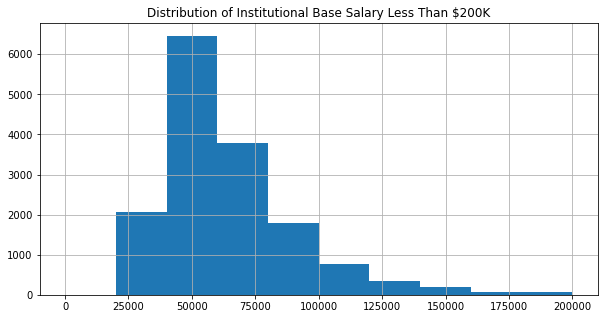

In [50]:
## Histogram for IBS
plt.figure(figsize=(10, 5))
subset_df[subset_df["PAY"] <= 200000].PAY.hist()
plt.title("Distribution of Institutional Base Salary Less Than $200K")
plt.show()

**Histogram for Number of Raises**

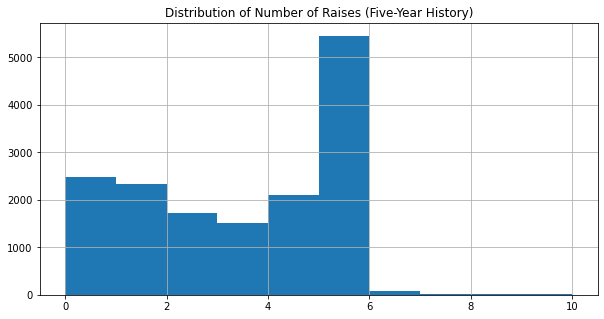

In [74]:
plt.figure(figsize=(10, 5))
subset_df.NUM_RAISES.hist()
plt.title("Distribution of Number of Raises (Five-Year History)")
plt.show()

**Histogram for Time to Last Raise**

- The 3,000 days to last raise skews the data quite a bit, so set it to less than 2000 to be able to view

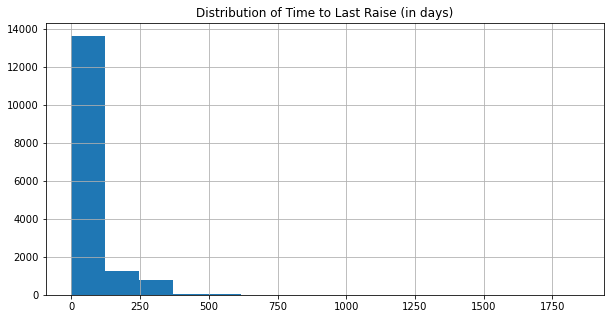

In [75]:
plt.figure(figsize=(10, 5))
subset_df.TIME_TO_LST_RAISE[subset_df.TIME_TO_LST_RAISE<=2000].hist(bins = 15)
plt.title("Distribution of Time to Last Raise (in days)")
plt.show()

**Weeks at University of Minnesota**

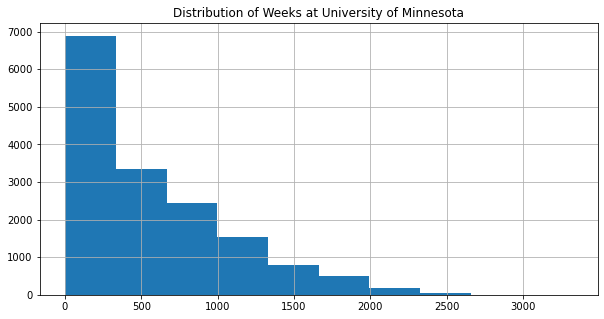

In [76]:
plt.figure(figsize=(10, 5))
subset_df.WEEKS_UMN.hist()
plt.title("Distribution of Weeks at University of Minnesota")
plt.show()

**Number of Supervisors**

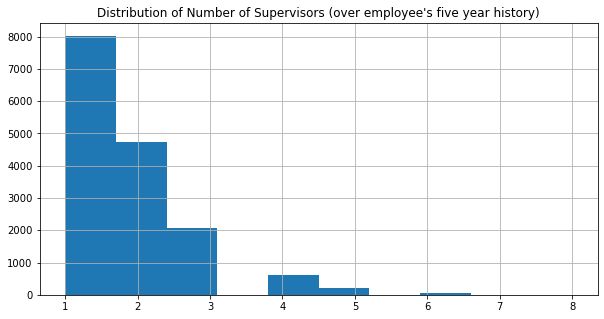

In [78]:
plt.figure(figsize=(10, 5))
subset_df.NUM_SUPS.hist()
plt.title("Distribution of Number of Supervisors (over employee's five year history)")
plt.show()

## 5.  Professional Staff & Faculty Classification Models - Model Building, Validation & Evaluation Metrics

### 5.1 Model Building

Similar to the section for the Data Extraction, we will only showcase an example of the Professional Staff Classification modeling, as the process for the Faculty Classification model is similar.  The full notebooks containing all the code are located in the Section 9 Appendix.

Prior to building the models, we have to perform the following:

* Create our X, y variables (X is our feature set, y is our target variable)
* Training/testing split
* Create Pipeline for machine learning (feature encoding, standardization/normalization, etc)
* Build functions for setting up new classifiers and hyperparameter settings
* Generate classifiers based on seven different algorithms using sklearn/XGBoost/LightGBM

In [79]:
## Create our X and y variables for training
X = subset_df

## Use the TARGET column from the classifier dataframe as our 'Y' or prediction
y = classifier_df["TARGET"]

**Training/Testing**

We calibrated and "fit" both our classification and time-to-event models on a training dataset, a subset of employees that are used to “learn” latent patterns between our factors and whether an employees is active or resigned.

We set aside a testing set to evaluate how well the model performs on unobserved data points and to provide an estimate
of how well the model will do on future data.

In [85]:
## Define a function for splitting the data
def my_train_test_split(X, y, test_size = .33):

    ## Set a random seed
    seed = 42
    ## Set the test size
    
    ## Split the data per the test size
    X_train, X_test, y_train, y_test =\
        train_test_split(X, y, test_size = test_size, random_state = seed)
    
    ## Return the four data sets required for training
    return X_train, X_test, y_train, y_test

## Create the data sets needed for training the models

X_train, X_test, y_train, y_test = my_train_test_split(X, y)

## Fill any possible remaining NA values.
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

print("We have {} employees for training, with {} feature columns for our modeling".format(*X_train.shape))
print()
print("We have {} employees for testing, with {} feature columns for our modeling".format(*X_test.shape))

We have 10529 employees for training, with 10 feature columns for our modeling

We have 5187 employees for testing, with 10 feature columns for our modeling


**Custom Scorer**

In order to specify the positive label as a 1 (a resigned employee) for the `GridSearch` scoring parameter, we have to create a customer scorer using one of the libraries from sklearn.

We are trying maximize **precision** (True Positives + False Positives / True Positives)

*More information can be found here: https://stackoverflow.com/questions/50933561/how-to-specify-positive-label-when-use-precision-as-scoring-in-gridsearchcv*

In [106]:
## Precision is the closeness of measurements to each other
custom_scorer = make_scorer(precision_score, greater_is_better = True,  pos_label = 1)

**Pipeline**

A `Pipeline` of transformations with a final estimator.

It will sequentially apply a list of transformations and a final classification model. Intermediate steps of the pipeline must be "transforms", that is, they must implement fit and transform methods. The final estimator only needs to implement fit.

*More information can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html*

In [89]:
## Create a new numeric transfomer
numeric_transformer = numeric_transformation()

## Create a new categorical transformer
categorical_transformer = categorical_transformation()

## Set up the preprocessing steps for the Pipeline

preprocessor = ColumnTransformer(transformers = [
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)],
        remainder = "passthrough")

**LightGBM classifier**

We need to create a new instance of the LightGBM classifier, as well as set the parameters that we want to cross-validate.

The pipeline assembles several steps that can be cross-validated together while setting different parameters.  For this, it enables setting parameters of the various steps using their names and the parameter name separated by a double underscore, as we can see below.

* One discovery that was made during the development process was that LightGBM cannot handle special characters in the column names (specifically the hyphen "-" character), so we use a regex function to replace those with a blank space instead.

In [107]:
## Import freshly install LightGBM library as our last classifier
import lightgbm as lgb

def lgb_clf():
    
    ## Create a new classifier
    lgb_clf = lgb.LGBMClassifier(is_unbalanced = True)
    
    ## Set up the parameters for LightGBM
    params = {
                "classifier__n_estimators": [400, 1000],
                "classifier__colsample_bytree": [0.7, 0.8],
                "classifier__max_depth": [15,20,25],
                "classifier__num_leaves": [50, 100, 200],
                "classifier__min_split_gain": [0.3, 0.4]
                            }
    
    return lgb_clf, params

## Create a new instance of the LightGBM algorithm
lgb_clf, lgb_params = lgb_clf()

## Prior to running through LightGBM Classifier, we have to remove special characters
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

### 5.2 Cross Validation
Cross validation is used to assess the generalization ability of an algorithm on a dataset. It can prevent a model from overﬁtting that is possibly caused by the high complexity of the model.

Grid search is a parameter searching algorithm that isused to automatically ﬁnd the most optimal parameters within a predeﬁned range.

The seven algorithms with fit with the data preprocessing methods, and the optimal algorithm parameters were deﬁned by the Grid Search technique within a predeﬁned range using `GridSearchCV`.

**Create function to create a GridSearchCV instance**

Exhaustive search over specified parameter values for a classification model.  Important members are fit, then predicted.

GridSearchCV implements a "fit", to fit the features to the targets and a "score" method to evaluate the training performance. It also implements "predict", "predict_proba" if they are implemented to also predict probabilities and targets.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

*More information can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html*

In [91]:
import time

def grid_search_cv(preprocessor, clf, params, X_train, y_train):
    
    ## Start a timer to see the training time
    start = time.perf_counter()
    
    pipelined_clf = Pipeline(steps = [("preprocessor", preprocessor),
                           ("classifier", clf)])
    
    ## Run through GridSearch to select the best model based on the parameter set
    grid = GridSearchCV(
                    pipelined_clf, ## Classifier
                    params, ## Param set
                    n_jobs = 20, ## When in production, increase number of jobs
                    scoring = custom_scorer,
                    cv = 5,
                    verbose = 2) ## To view the computation time
    
    grid.fit(X_train, y_train)
    
    ## Set an end time
    end = time.perf_counter()
    
    ## Save the best model for evaluation
    model = grid.best_estimator_
    
    ## Save the best score for evaluation
    best_score = grid.best_score_
    
    ## Display the run time
    print("The GridSearchCV took {:.2f} minutes to complete.".format((end-start)/ 60))
    
    return pipelined_clf, model, best_score

**Run the classifier**

Here we put all of the pieces together; we give the grid_search_cv function the preprocessor, the untrained classifier, the parameter set we want to use to train the model, and the training data.  The output of the function is:

* The classifier pipeline (which we use to get the categorical column names for the feature importance
* The fully trained model with the best parameter set
* The best score from the GridSearch for the model evaluation

In [97]:
lgb_pipeline, lgb_model, lgb_score = grid_search_cv(preprocessor, lgb_clf, lgb_params, X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:   38.4s
[Parallel(n_jobs=20)]: Done 360 out of 360 | elapsed:  1.8min finished


The GridSearchCV took 1.84 minutes to complete.


In [98]:
## Once the LightGBM model is fitted, we need to grab the categorical features that were encoded for the feature importance

encoded_features = list(lgb_model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"].get_feature_names(input_features = categorical_features))

## Save the column names to a variable to be used in the call to the feature importance plot function
column_names = numeric_features + encoded_features

### 5.3 Evaluation Metrics

**Precision/Recall/Accuracy - Background Information**

During our initial discussions, one of the requirements for successful delivery is a highly "accurate" model.  After further exploration, we see that only around 15% of employees resign during the five-year history of data.

Accuracy is simply the number of correct predictions over total predictions.  Our model could achieve 85% accuracy by simply predicting that that the employee will not resign every single time the model makes a prediction, since 1 - 15% = 85%.  However, this model is completely useless, as our goal is to predict resigned employees.  In this case, accuracy is not the best metric to strive for.

There are many other classification metrics that can be used instead:
* Precision: how many employees selected from our model will actually churn?
* Recall: how many employees who could potentially resign did our model actually identify?
* Lift: how much better is my model at identifying employees who resigned vs. random chance?

Here are more formal definitions for evaluation metrics that can be used in classification below:

**Accuracy**: The number of correct predictions divided by the total number of predictions, multiplied by 100.

**Precision**: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.  The best value is 1 and the worst value is 0.

**Recall**: The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.  The best value is 1 and the worst value is 0.

**F1**:  The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)

**Lift**: A measure of the performance of a classification model at predicting or classifying cases as having an enhanced response (with respect to the population as a whole), measured against a random choice targeting model. A targeting model is doing a good job if the response within the target is much better than the average for the population as a whole. Lift is simply the ratio of these values: target response divided by average response.

*More information can be found here: https://scikit-learn.org/stable/modules/model_evaluation.html*

<img src="Team2Scoring.png"> *Credit: CAL Team 2 Final Presentation*

In [113]:
def model_outcomes(model, score, X_test, y_test):

    ## Show the best score from the XGBClassifier
    print("The best precision score from the model GridSearch is: {:.5f}.".format(score))
    print()

    ## Make predictions on using the best model
    ## This will inform us whether the model needs tuning
    preds = model.predict(X_test)
    preds_bin = (preds > 0.5).astype(np.int_)

    ## Print the confusion matrix
    print(confusion_matrix(y_test,preds_bin))
    ## Give some instructions on how to read it
    print('\nHow to read a confusion matrix:')
    print(np.array([['True Negatives','False Positives'],['False Negatives','True Positives']]))

    print()
    print(classification_report(y_test, preds_bin))

In [101]:
def plot_feature_importance(pipelined_model, X_train, column_names, model_type = "tree"):
    
    ## Plot the feature importance
    fig, ax = plt.subplots(figsize = (15, 8))

    ## Save the feature importance to a var
    ## Split into three booleans for the different classifiers
    
    if model_type == "tree":
    ## Only save the top 20!  This will be important when we have lots of features
    ## Need to extract the model from the pipeline to get the feature importances
        importances = pipelined_model.steps[1][1].feature_importances_[0:20]
          
    ## Sort the features in descending order
    indices = np.argsort(importances)
    ## Get the column names for the feature importance
    names = [column_names[i] for i in indices] ## Column names are generated from fitting the first Pipeline and obtaining the transformed feature names
    
    ## For the plots
    ## Put a title for Feature Importance
    plt.title("Feature Importance")
    ## Add bars to bar graph
    plt.barh(np.arange(0, 20), importances[indices])
    ## Add feature names to x-axis
    plt.yticks(np.arange(0, 20), names)
    ## Show the vis!
    plt.show()

**Print out classification reports**

In [114]:
model_outcomes(lgb_model, lgb_score, X_test, y_test)

The best precision score from the model GridSearch is: 0.88243.

[[4136   81]
 [ 204  766]]

How to read a confusion matrix:
[['True Negatives' 'False Positives']
 ['False Negatives' 'True Positives']]

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4217
           1       0.90      0.79      0.84       970

    accuracy                           0.95      5187
   macro avg       0.93      0.89      0.90      5187
weighted avg       0.94      0.95      0.94      5187



The outcomes that are here on the screen are based on that "testing" set - which again, are employees that the algorithms did not know anything about prior to the training. 

For Professional Staff, our model predicted that 867 employees would resign out of 5,200 active employees in testing data; of those predicted to resign, 766 were correct.  This gets us a **precision** score of 90% (how many of the selected employees are relevant and were going to resign?).

For Faculty, our model predicted that 184 employees would resign out of the 1,500 active employees in the testing data; of those predicted to resign, 162 were correct.  This gets us a **precision** score of 88%.

One additional note is that the precision is slightly lower for Faculty because there are much fewer examples of employee resignations in the Faculty population.
 
High precision is important because we want leadership to be confident they will not be intervening with employees who may not been thinking about resigning.

**Display the Feature Importances**

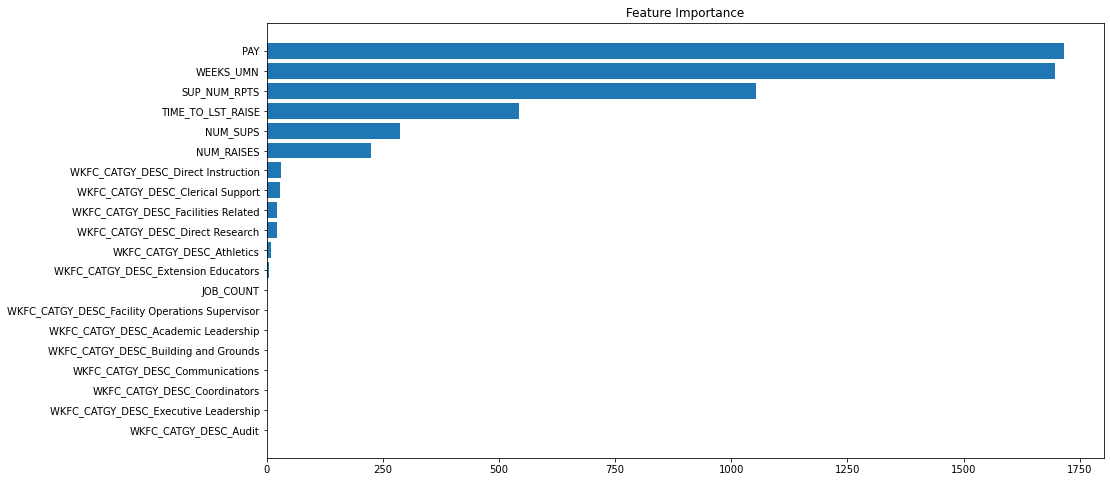

In [103]:
## Plot the feature importance for training data
plot_feature_importance(lgb_model, X_train, column_names, model_type = "tree")

Classification models can help us uncover latent or undiscovered features for identifying employees who have resigned.

Feature importance is an important outcome of any data mining process, because it does three things: provides insight into the data being fed to the models, insight in the model itself and how it is making its decisions, and can improve the model performance by highlighting the most important factors.  This is important because you as an end user may want to know what the model says are important factors and determine if there are steps you can take to mitigate these potential problems.

In our classification models, we used how many times a feature was used to calculate the "feature importance".

Based on the data that we were provided, we see that our Professional Staff and Faculty classification models identified factors like **Salary, Weeks at the University, Number of Direct Reports for Current Supervisor,** and **Time to Last Raise** as important for identifying employees who have resigned.

* Note: there may be additional factors influencing employee resignations that are outside the scope of this project.  These are also subject to change when additional/new features are incorporated into the models.

*More information can be found here: https://scikit-learn.org/stable/modules/feature_selection.html & https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html*

**Show a Lift Curve**

In [110]:
def plot_lift_curve(pipelined_model, X_test, y_test):
    
    ## Plot the Lift Curve
    fig, ax = plt.subplots(figsize = (15, 8))
    
    ## Generate probablities for our testing set
    probas_ = lgb_model.predict_proba(X_test)
    
    ## Thank you sci-kit plotting package!
    skplt.metrics.plot_lift_curve(y_test, probas_, ax = ax)

    plt.title("Professional Staff Classification")
    plt.xlabel("Percentage of Total Professional Staff Population")
    plt.ylabel("Effectiveness of Classification Model")
    ax.set_xticklabels(["", "0%", "20%", "40%", "60%", "80%", "100%"])

    plt.legend(["Active Employees", "Resigned Employees", "Random Chance"])

    plt.show()

In [ ]:
plot_lift_curve(lgb_model, X_test, y_test)

<img src="LiftCurvewithAnnotation.png"> *Credit: CAL Team 1 Final Presentation*

One useful way to think of a lift curve is to consider a data mining model that attempts to identify the likely responders to a mailing by assigning each case a "probability of responding" score. The lift curve helps us determine how effectively we can "skim the cream" by selecting a relatively small number of cases and getting a relatively large portion of the responders.

The lift will vary with the number of cases we choose to act on.  A good classifier will give us a high lift when we act on only a few cases (i.e. use the prediction for the ones at the top).

In the case of predicting when an employee will churn, based on the Professional Staff classification model, by reaching out to the top 10% of employees predicted to resign by our model, it would result in our leaders contacting 5 times as many employees who would resign versus blinding selecting them out of a hat.

### 5.4  Reviewing the model decision-making process

LightGBM is a gradient boosting framework that uses decision trees to predict the value of a target variable (i.e. active vs. resigned employee) based on several input variables (i.e. our features).

LightGBM will "fit" trees and determine which employees it did not classify with great enough precision, giving those employees higher weights during the next training cycle; it will iterate through this process thousands of times to get the best possible separation of active vs. resigned employees.

**Advantages**:
- Simple to understand and interpret
- Performs well with large datasets
- Mirrors human decision making more closely than other approaches

LightGBM utilizes a leaf-wise growth strategy when growing decision tree; when training each individual decision tree and splitting the data, there are two strategies that can be employed: level-wise and leaf-wise.

The level-wise strategy maintains a balanced tree, whereas the leaf-wise strategy splits the leaf that reduces the global loss the most (the algorithm will make less mistakes when assigning a probability of belonging to one class or the other).

Level-wise training can be seen as a form of regularized training since leaf-wise training can construct any tree that level-wise training can, whereas the opposite does not hold. Therefore, leaf-wise training is more prone to overfitting but is more *flexible*, which makes it a better choice for large datasets and is the only option available in LightGBM.

<img src="LeafWiseGrowth.png"> *Credit: Keita Kurita, Machine Learning Paper*

Another benefit to LightGBM is that you can actually plot the decision trees after the models have been fit with data, to get an idea of how the model made its decisions; there can hundereds of trees after fitting the model and they can be extremely complex; this example is a sample tree from the Faculty classifier that was relatively small, and we can get a sense of the different factors being used by the model, including Time to Last Raise, Job Count, Reports to Title, and Number of Supervisors.

In [ ]:
fig, ax = plt.subplots(figsize = (60, 60))

lgb.plot_tree(lgb_model, tree_index = 58, ax = ax)

<img src="FacultyTree.png">

*More information can be found here: https://lightgbm.readthedocs.io/en/latest/Features.html*

## 6. Evaluation Metrics, Model Building, Valdiation (Time-to-Event Model)

### 6.1 A Brief Introduction to Time-to-Event Models

**What is a time-to-event analysis? What does it do for us that classification models can't?**
<br>
Strictly speaking, a time-to-event or survival analysis is a "collection of statistical procedures for data analysis for which the outcome variable of interest is *time until an event occurs*. In the context of this project, our primary events of interest are resignations, but we could easily change this to consider times to retirements, deaths, or contract non-renewals. While a pure classification model can predict the likelihood that an individual will exit the university based on the given data, they are not as well suited for telling us when (or in what order) individuals will exit the university.

**Why can't I take a purely descriptive approach?**
<br>
One of the biggest hurdles survival analysis can help us overcome is the issue of censorship. In this context, censorship describes the situation where we witness the beginning of an individuals lifeline (i.e. their university hire date), but cannot see the end of their lifeline. Censorship of this variety generally occurs for one of three reasons: end of study, withdrawal from study, lost to follow-up (i.e., we can't figure out what happened to them). Of the three varieties, we will typically be dealing with censorship due to *end of study*. This is typically referred to as *right censhorship*.

**The following figure highlights the issues associated with right censorship**

<img src="Screen Shot 2020-08-12 at 12.06.17 AM.png">

### 6.2 Initial Setup and Time-to-Event Feature Engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import NelsonAalenFitter
from lifelines.utils import median_survival_times
from lifelines import CoxPHFitter, WeibullAFTFitter
from lifelines.utils import k_fold_cross_validation
from lifelines.calibration import survival_probability_calibration
from lifelines.utils import median_survival_times, qth_survival_times 

from sklearn.model_selection import GridSearchCV
from lifelines.utils.sklearn_adapter import sklearn_adapter
from sklearn.model_selection import train_test_split

# Setting display options
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
plt.rcParams['figure.figsize'] = [9, 4]

import warnings
warnings.filterwarnings("ignore")


# Using a custom theme that emulates ggplot's theme_bw
theme_bw = "theme_bw.mplstyle"
plt.style.use(theme_bw)

**Time-to-Event Feature Engineering**

In [3]:
# Pay Helper Function V1
def pay_helper(df, list_in):
    
    '''Note: this function builds pay features. the df must possess the 
    columns PAY, and ZDEPTID. we will ultimately want to use this 
    function on test/train separately.'''
   
    df_ZDEPTID = df.groupby(['ZDEPTID'], as_index=0).PAY.median()
    df = pd.merge(df, df_ZDEPTID, on='ZDEPTID', suffixes=('', '_ZDEPTID'))
    df['ZDEPT_MEDIAN_BOOL'] = np.where(df['PAY'] > df['PAY_ZDEPTID'], 1, 0)
    df['PAY_BINS'] = pd.cut(df.PAY,
                             np.arange(df['PAY'].min(), 
                                       df['PAY'].max(), 50000))
    df = df.drop(['ZDEPTID', 'PAY', 'PAY_ZDEPTID'], axis=1)
    df = pd.get_dummies(df, prefix=list_in, columns=list_in, drop_first=1)
    
    df = df[df.PAY_BINS.isnull() != True]
    
    return df

# Data Helper Function
def load_data():
    
    """Note: To avoid redundancy. This function loads the initial dataframe
    and performs the basic survival feature engineering steps. Returning
    a dataframe that is ready to be used with the pay helper function."""
    
    # Please note the directory and flat_files are hard coded so they must
    # be recoded by the user. 

    file_directory = 'C:/Users/watki162/Desktop/Survival_Analysis_Work/'
    flat_file = 'staff_file.csv'
    df = pd.read_csv(file_directory + flat_file, low_memory = 0)
    df.drop_duplicates(keep='first', inplace=True)
    
    # Filling in NAs
    df.NUM_RAISES = df.NUM_RAISES.fillna(0) # Just in case

    # Building event categories 
    df['EVENT_RESIGN'] = df['WKFC_ACTN_RSN_LD'].apply(
    lambda x: 1 if x == "Resignation" else 0)
    
    df['EVENT_RETIRE'] = df['WKFC_ACTN_RSN_LD'].apply(
    lambda x: 1 if x == "Retirement" else 0)
    
    # Ensure all times greater than 0
    df = df[df.WEEKS_UMN > 0]

    return df

**Note: For subsequent sections, only the following import and load_data() is necessary to refresh the dataset

In [4]:
from cph_startup_script import *

Startup Steps Complete


**Load Data and Preview**

In [5]:
df = load_data()

In [6]:
df.head(3)

,Unnamed: 0,EMPLID,ORIG_HIRE_DT,UNIV_STRT_DT,POS_ENTR_DT,DEPT_ENTR_DT,JOB_CD_STRT_DT,UNIV_TRMN_DT,LST_RAISE_DT,EMP_STS_CD,EMP_STS_DESC,WKFC_ACTN_RSN_LD,POS_NBR,POS_TTL,JOB_CD,JOB_TTL,JOB_CATGY_DESC,JOBCD_GRP_CD,JOBCD_GRP_DESC,WKFC_CATGY_CD,WKFC_CATGY_DESC,EMP_CLSS_CD,EMP_CLSS_DESC,TENURE_FLG,TENURE_TRK_FLG,RPT_TO_EMPLID,RPT_TO_FULL_NM_TXT,RPT_TO_POS,RPT_TO_TTL,DEPTID,DEPTID_LD,ZDEPTID,ZDEPTID_LD,CLLG_ADM_UNT_CD,CLLG_ADM_UNT_LD,VP_ADM_UNT_CD,VP_ADM_UNT_LD,CMP_LD,LOCATION,DEPT_SIZE,NUM_SUPS,DAYS_SUP_CHG,SUP_NUM_RPTS,MULTI_JOB_IND,JOB_COUNT,PAY,NUM_RAISES,TIME_TO_LST_RAISE,MID_PAY,PAY_ABOVE_MID,WEEKS_JOBCODE,WEEKS_POS,WEEKS_DEPT,WEEKS_UMN,TENURE,TARGET,EVENT_RESIGN,EVENT_RETIRE
0,6,1846201,2013-11-25,2013-11-25,2017-02-13,2017-02-13,2017-02-13,2018-10-13,2018-06-11,T,Terminated,Resignation,288566,Prin Ofc & Admin Specialist,1826,Prin Ofc & Admin Specialist,Labor Represented,LR,Labor Represented,UM15,Clerical Support,LRC,LR - Clerical,N,N,3220895,"Fenner,Cassandra",210523,Admin Associate 3 Supervisor,11458,"Dent Operative, Div of",Z0075,DENT Restorative Sciences,TDEN,"DENTISTRY, SCHOOL OF",TEVP,"ACADEMIC AFFAIRS/PROVOST,SR VP",TWIN CITIES,TCEASTBANK,11,4,1114.0,5.0,0.0,1,39686.40,4.0,103.1,36888.80,1,172.142857,172.142857,172.142857,340.142857,0,1,1,0
1,10,8008155,2018-03-19,2018-03-19,2019-01-07,2019-01-07,2018-03-19,NaN,2019-12-23,A,Active,Step/Progression,288566,Prin Ofc & Admin Specialist,1826,Prin Ofc & Admin Specialist,Labor Represented,LR,Labor Represented,UM15,Clerical Support,LRC,LR - Clerical,N,N,3443437,"Mahon,Monica",310588,Sr Office/Admin Service Supv,11458,"Dent Operative, Div of",Z0075,DENT Restorative Sciences,TDEN,"DENTISTRY, SCHOOL OF",TEVP,"ACADEMIC AFFAIRS/PROVOST,SR VP",TWIN CITIES,TCEASTBANK,11,3,386.0,6.0,0.0,1,44824.00,2.0,23.1,36888.80,1,115.142857,73.142857,73.142857,115.142857,0,0,0,0
2,13,751754,2000-08-28,2000-08-28,2007-07-31,2016-07-01,2016-07-01,NaN,2019-06-10,A,Active,Merit,227308,Lecturer,9753,Lecturer,P&A,AP,Academic Professional,UM03,Direct Instruction,ACP,Academic Professional,N,N,2476764,"Bartlett,Kenneth Russell",289210,Chair (With Faculty Rank),11207,"Org Leadership, Policy & Dev",Z0172,"CEHD Org Leadership,Policy/Dev",TCED,"EDUCATION & HUMAN DEVEL, COLL",TEVP,"ACADEMIC AFFAIRS/PROVOST,SR VP",TWIN CITIES,TCEASTBANK,57,2,1432.0,47.0,0.0,1,71308.14,5.0,51.1,61528.05,1,204.571429,670.000000,204.571429,1031.142857,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17586 entries, 0 to 17586
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          17586 non-null  int64  
 1   EMPLID              17586 non-null  int64  
 2   ORIG_HIRE_DT        17586 non-null  object 
 3   UNIV_STRT_DT        17586 non-null  object 
 4   POS_ENTR_DT         17586 non-null  object 
 5   DEPT_ENTR_DT        17586 non-null  object 
 6   JOB_CD_STRT_DT      17586 non-null  object 
 7   UNIV_TRMN_DT        4756 non-null   object 
 8   LST_RAISE_DT        14682 non-null  object 
 9   EMP_STS_CD          17586 non-null  object 
 10  EMP_STS_DESC        17586 non-null  object 
 11  WKFC_ACTN_RSN_LD    17586 non-null  object 
 12  POS_NBR             17586 non-null  int64  
 13  POS_TTL             17586 non-null  object 
 14  JOB_CD              17586 non-null  object 
 15  JOB_TTL             17586 non-null  object 
 16  JOB_

**Evaluating Missing Values**

In [8]:
print(df.isnull().sum()[df.isnull().sum() != 0])

UNIV_TRMN_DT    12830
LST_RAISE_DT     2904
dtype: int64


As we would expect, a number of the missing values are associated with end dates that may or may not appear in our data set due to censorship

**Examining Survival Analysis Features**

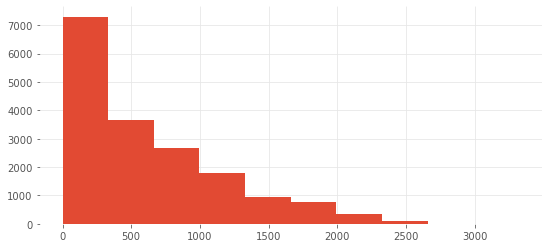

In [9]:
# Most individuals are observed throughout the study period. 
df.WEEKS_UMN.hist() 

**Note:** Throughout this analysis, we'll use weeks as our main unit of time. (WEEKS_UMN)

In [10]:
df[['WEEKS_UMN']].describe()

,WEEKS_UMN
count,17586.000000
mean,625.328971
std,549.004713
min,0.142857
25%,201.142857
50%,428.142857
75%,943.107143
max,3324.142857


In [11]:
# Examining a subset of median times. Namely, retirements and resignations
df[['WKFC_ACTN_RSN_LD', 'WEEKS_UMN']].groupby(['WKFC_ACTN_RSN_LD']).median()

,WEEKS_UMN
WKFC_ACTN_RSN_LD,
Absence,625.142857
Academic Promotional Increase,795.142857
Additional Job,88.642857
Annual Increase,507.142857
Benefits Use Only,335.928571
Break Between Appointment,397.142857
Contract,395.142857
Conversion,1556.857143
Disciplinary Action,283.000000


In [12]:
# Examining a subset of median times. Namely, retirements and resignations
df[['WKFC_ACTN_RSN_LD', 'WEEKS_UMN']].groupby(['WKFC_ACTN_RSN_LD']).count()

,WEEKS_UMN
WKFC_ACTN_RSN_LD,
Absence,11
Academic Promotional Increase,7
Additional Job,10
Annual Increase,969
Benefits Use Only,882
Break Between Appointment,223
Contract,229
Conversion,9
Disciplinary Action,7


**Note:** There are roughly 2875 resignations in our data set 

In [13]:
df[['EVENT_RESIGN', 'EMPLID']].groupby(['EVENT_RESIGN']).count()/df.count()[1]

,EMPLID
EVENT_RESIGN,
0,0.836518
1,0.163482


Only about 16% of all individuals within our data set have terminally resigned.

## 6.2 Time-to-Event Approach and Considerations

For this analysis, we will treat resignations as an event that is independent from the other modes of decrement observed within this model. That is to say, we'll effectively treat individuals who retire or die as being identical to (or not meaningfull different from) the other individuals who've been censored. To this end, we've recoded resignations as a 1 and all other observations as a 0. 

In the following sections we will consider the following models:
* Kaplan-Meier Estimator - Univariate Analysis
* Cox Proportional Hazard Model - Multivariate Analysis
* Conditional Survival Forest Model - Non-linear Analysis

## 6.3 Model Building

### 6.3.1 Kaplan-Meier Estimator

### **Fitting the model**

In [14]:
# removing excess columns
df_KM = df[['EVENT_RESIGN', 'WEEKS_UMN', 'WKFC_CATGY_DESC']]

In [15]:
df_KM.head(3)

,EVENT_RESIGN,WEEKS_UMN,WKFC_CATGY_DESC
0,1,340.142857,Clerical Support
1,0,115.142857,Clerical Support
2,0,1031.142857,Direct Instruction


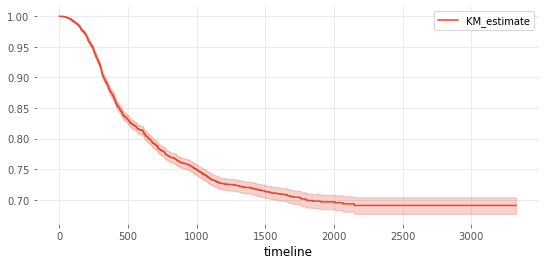

In [16]:
Time = df_KM['WEEKS_UMN']
Resignation = df_KM['EVENT_RESIGN'] 

kmf = KaplanMeierFitter().fit(Time, event_observed=Resignation)
kmf.plot()

The probability of survival appears to drop substantially during the first 500 weeks of an individuals tenure and gradually level off thereafter.

### Examining Survival Among Employee Subsets

**Workforce Subsets**

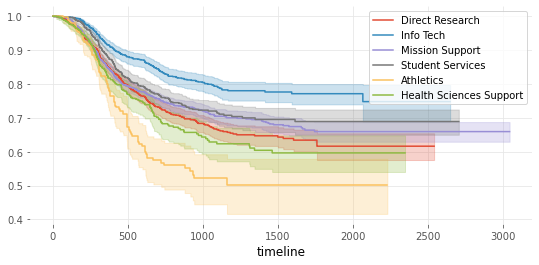

In [17]:
# Examining survival among several employee class subsets within our data set

ax = plt.subplot(111)

research = (df_KM["WKFC_CATGY_DESC"] == "Direct Research")
kmf.fit(Time[research], event_observed=Resignation[research], 
        label="Direct Research")
kmf.plot(ax=ax)

infotech = (df_KM["WKFC_CATGY_DESC"] == "Info Tech")
kmf.fit(Time[infotech], event_observed=Resignation[infotech], 
        label="Info Tech")
kmf.plot(ax=ax)

mission = (df_KM["WKFC_CATGY_DESC"] == "Mission Support")
kmf.fit(Time[mission], event_observed=Resignation[mission], 
        label="Mission Support")
kmf.plot(ax=ax)

studentservices = (df_KM["WKFC_CATGY_DESC"] == "Student Services")
kmf.fit(Time[studentservices], event_observed=Resignation[studentservices], 
        label="Student Services")
kmf.plot(ax=ax)

athletics = (df_KM["WKFC_CATGY_DESC"] == "Athletics")
kmf.fit(Time[athletics], event_observed=Resignation[athletics], 
        label="Athletics")
kmf.plot(ax=ax)

health = (df_KM["WKFC_CATGY_DESC"] == "Health Sciences Support")
kmf.fit(Time[health], event_observed=Resignation[health], 
        label="Health Sciences Support")
kmf.plot(ax=ax)

In [18]:
# Examining a subset of mean times. Namely, Athletics 
df[['WKFC_CATGY_DESC', 'WEEKS_UMN']].groupby(['WKFC_CATGY_DESC']).mean()[0:7]

,WEEKS_UMN
WKFC_CATGY_DESC,
Academic Leadership,935.757143
Athletics,449.305344
Audit,721.639098
Building and Grounds,714.025818
Clerical Support,697.114135
Communications,511.148293
Coordinators,505.212121


In [19]:
# Examining a subset of mean times. Namely, Athletics and Coordinators
df[['WKFC_CATGY_DESC', 'WEEKS_UMN']].groupby(['WKFC_CATGY_DESC']).median()[0:7]

,WEEKS_UMN
WKFC_CATGY_DESC,
Academic Leadership,830.142857
Athletics,310.000000
Audit,367.000000
Building and Grounds,556.571429
Clerical Support,454.142857
Communications,365.142857
Coordinators,387.142857


**Employee Class Subsets**

In [20]:
df.groupby('EMP_CLSS_CD').count()['EMPLID']

EMP_CLSS_CD
ACA    1992
ACP    5659
CVL    6387
FEB      81
LRC    1850
LRH     285
LRS     430
LRT     851
PDO      51
Name: EMPLID, dtype: int64

In [21]:
# removing excess columns
df_KM = df[['EVENT_RESIGN', 'WEEKS_UMN', 'EMP_CLSS_CD']]

In [22]:
df_KM.head(3)

,EVENT_RESIGN,WEEKS_UMN,EMP_CLSS_CD
0,1,340.142857,LRC
1,0,115.142857,LRC
2,0,1031.142857,ACP


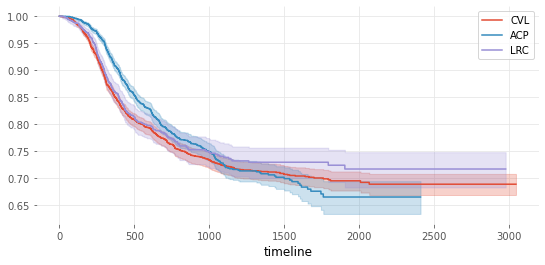

In [23]:
# Examining survival among several employee class subsets within our data set

ax = plt.subplot(111)

cvl = (df_KM["EMP_CLSS_CD"] == "CVL")
kmf.fit(Time[cvl], event_observed=Resignation[cvl], 
        label="CVL")
kmf.plot(ax=ax)

acp = (df_KM["EMP_CLSS_CD"] == "ACP")
kmf.fit(Time[acp], event_observed=Resignation[acp], 
        label="ACP")
kmf.plot(ax=ax)

lrc = (df_KM["EMP_CLSS_CD"] == "LRC")
kmf.fit(Time[lrc], event_observed=Resignation[lrc], 
        label="LRC")
kmf.plot(ax=ax)

**Note:** The survival for Faculty is still considerably higher than other groups

### 6.3.2 Cox Proportional Hazard Model

For this section of our analysis, we explored three models with varying levels of complexity.

### Basic Model

<br>

**Variables:**
- Resignation Events (required) - # Did a resignation occur?
- Weeks UMN (required) - How long has/did the individual work at the university?
- Workforce Category Descriptions - What is their job (very roughly)?

#### Train Test Split

In [24]:
df_cph = df[['EVENT_RESIGN', 'WEEKS_UMN', 'WKFC_CATGY_DESC']] 
df_cph = pd.get_dummies(df_cph, drop_first=1)

In [25]:
df_train, df_test = train_test_split(df_cph, test_size=.3, random_state=42)

In [26]:
print("df shape:", df.shape,
      "\ndf_cph shape:", df_cph.shape,
      "\ndf_train shape:", df_train.shape,
      "\ndf_test shape:", df_test.shape)

df shape: (17586, 58) 
df_cph shape: (17586, 26) 
df_train shape: (12310, 26) 
df_test shape: (5276, 26)



### 6.2 Evaluation Metrics
### 6.3 Model Building
### 6.4 Validation

#### Fitting the model

In [27]:
cph = CoxPHFitter().fit(df=df_train, 
                        duration_col='WEEKS_UMN', 
                        event_col='EVENT_RESIGN', 
                        show_progress=0, 
                        step_size=.05)
cph.print_summary()

**Note:** Concordance (otherwise referred to as the c-index) evaluates the accuracy of the ranking of predicted time. For this model, we obtain a relatively high concordance score of 0.61. Concordance is, conceptually, is very to the AUC. Concordance scores range from 0 to 1, where 0 is perfectly wrong and 1 is perfectly right. In general, survival models will have a concordance between 0.55 and 0.75.

It is worth noting that our variables are overwhelmingly insignificant.

**Concordance Index**

It is a commonly used most commonly for performance evaluation for survival models. It is used for the validation of the predictive ability of a survival model[18]. It is the probability of concordance between the predicted and the observed survival. It is the “fraction of all pairs of subjects whose predicted survival times are correctly ordered among all subjects that can actually be ordered”[16].

--https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e

**EXAMPLE**
<br>
**Interpreting Coefficients:** Using WKFC_CATGY_DESC_Athletics as an example, (our most significant variable) being a member of the athletics workforce means your baseline hazard (for resigning) will increase by a factor of exp(1.33)=5.51 - about 551% increase. 

**Note:** Academic leadership is our base class for WKFC_CATGY_DESC

$$\text{exp(1.71)} = {\text{hazard of athletics subjects at time t} \over \text{hazard of non-athletics subjects at time t}}.$$

We can visually evaluate this result by examining our NAF estimates.

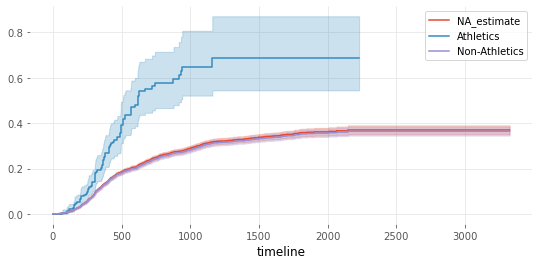

In [28]:
df_KM = df[['EVENT_RESIGN', 'WEEKS_UMN', 'WKFC_CATGY_DESC']]

Time = df_KM['WEEKS_UMN']
Resignation = df_KM['EVENT_RESIGN'] 

naf = NelsonAalenFitter().fit(Time, event_observed=Resignation)
naf.plot()

# Examining Coordinator vs. non-Coordinator Hazards

ax = plt.subplot(111)

Athletics = (df_KM["WKFC_CATGY_DESC"] == "Athletics")
naf.fit(Time[Athletics], event_observed=Resignation[Athletics], 
        label="Athletics")
naf.plot(ax=ax)

non_Athletics = (df_KM["WKFC_CATGY_DESC"] != "Athletics")
naf.fit(Time[non_Athletics], event_observed=Resignation[non_Athletics], 
        label="Non-Athletics")
naf.plot(ax=ax)

#### Checking Model Validity

We can begin by checking the concordance obtained with our test data

In [29]:
print("Concordance Score: ", 
      cph.score(df_test, scoring_method="concordance_index"))

Concordance Score:  0.6011170742062073


This is a reasonably good concordance score. To make better use of our limited data, we can also attempt to validate our model using k-fold cross validation.  

This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds.

— Page 181, An Introduction to Statistical Learning, 2013.

In [30]:
# Using K-fold cross validation
cph = CoxPHFitter()
scores = k_fold_cross_validation(fitters=cph, 
                                 df=df_cph, 
                                 duration_col='WEEKS_UMN', 
                                 event_col='EVENT_RESIGN',
                                 k=5, 
                                 scoring_method="concordance_index")
print(scores)

[0.6039192442469432, 0.5977721036067553, 0.5903447550849659, 0.6031422398240207, 0.6139698057736269]


Our k-fold results are consistent with our out of sample validation. Our model is at least doing better than random guessing.

### More Advanced Model


<br>

**Variables:**
- Resignation Events (required) - Did a resignation occur?
- Weeks UMN (required) - How long has/did the individual work at the university?
- Workforce Category Descriptions - What is their job (very roughly)?
- Job Count - How many jobs do they hold?
- Number of Raises - How many raises have they received?
- Pay (binned values) - How much do you earn?
- Work Location - Where do they work?
- Pay Relative to ZDept Median (binary)

**Note:** Within this model, PAY_BINS and LOCATION are incorporated via stratification. This allows us to accomodate non-proportionality within these variables into our Cox model.

#### Train Test Split

In [31]:
df_cph = df[['EVENT_RESIGN', 'WEEKS_UMN', 'JOB_COUNT',  
             'NUM_RAISES', 'PAY', 'ZDEPTID', 'WKFC_CATGY_DESC', 
             'LOCATION', 'TIME_TO_LST_RAISE']] 

categorical_features = ['WKFC_CATGY_DESC', 'ZDEPT_MEDIAN_BOOL']

df_train, df_test = train_test_split(df_cph, test_size=.3, random_state=42)

df_train = pay_helper(df_train, categorical_features)
df_test = pay_helper(df_test, categorical_features)

In [32]:
print("df shape:", df.shape,
      "\ndf_cph shape:", df_cph.shape,
      "\ndf_train shape:", df_train.shape,
      "\ndf_test shape:", df_test.shape)

df shape: (17586, 58) 
df_cph shape: (17586, 9) 
df_train shape: (12305, 32) 
df_test shape: (5274, 32)


#### Fitting the model

In [33]:
# setting pay and location as stratas
cph = CoxPHFitter().fit(df=df_train, 
                        duration_col='WEEKS_UMN', 
                        event_col='EVENT_RESIGN', 
                        show_progress=0, 
                        step_size=.05, 
                        strata=['PAY_BINS', 'LOCATION'])

cph.print_summary()

**Note 1:** Adding a few more covariates appears to help our model. The concordance of our model has increased from 0.65 to 0.84, which represents a reasonably high level of performance. It is also worth noting that the partial AIC is much lower than our previous model. 

It is also worth noting that a number of our variables are also now statistically significant. Interestingly, number of raises, whether or not an individuals pay is above their department median, whether or not an individual is a member of the Faculty workforce, and whether or not an individual is a member of Direct Research are all statistically significant at the 5% level.

**Note 2:** For this model we employ a stratified cox model. Stratification allows us to include predictors in our model that do not satisfy the PH assumptions. Due to the predictive focus of this project, we do not spend a considerable examining the proportional hazard assumptions

#### Validation

In [34]:
df_test.reset_index(inplace=True)
print("Concordance Score: ", 
      cph.score(df_test, scoring_method="concordance_index"))

Concordance Score:  0.8427596442683066


In [35]:
df_cph = pay_helper(df_cph, ['WKFC_CATGY_DESC', 'ZDEPT_MEDIAN_BOOL'])

cph = CoxPHFitter(strata=['PAY_BINS', 'LOCATION'])
scores = k_fold_cross_validation(fitters=cph, 
                                 df=df_cph, 
                                 duration_col='WEEKS_UMN', 
                                 event_col='EVENT_RESIGN',
                                 k=5, 
                                 scoring_method="concordance_index")
print(scores)

[0.8421918356713357, 0.837366728951418, 0.855898233300545, 0.8405803329732872, 0.8408405075623052]


### Modeling with Regularization


<br>
**Variables:**
- Resignation Events (required) - Did a resignation occur?
- Weeks UMN (required) - How long has/did the individual work at the university?
- Workforce Category Descriptions - What is their job (very roughly)?
- Job Count - How many jobs do they hold?
- Number of Raises - How many raises have they received?
- Pay (binned values) - How much do you earn?
- Work Location - Where do they work?
- Pay Relative to ZDept Median (binary)
- Hours Worked Per Week

**Note:** Within this model, PAY_BINS and LOCATION are incorporated via stratification. This allows us to accomodate non-proportionality within these variables into our Cox model.

#### Train Test Split

In [36]:
df_cph = df[['EVENT_RESIGN', 'WEEKS_UMN', 'JOB_COUNT', 'NUM_RAISES', 
             'PAY', 'ZDEPTID', 'WKFC_CATGY_DESC', 'LOCATION', 
             'TIME_TO_LST_RAISE']] 

categorical_features = ['WKFC_CATGY_DESC', 'ZDEPT_MEDIAN_BOOL']

df_train, df_test = train_test_split(df_cph, test_size=.3, random_state=42)

df_train = pay_helper(df_train, categorical_features)
df_test = pay_helper(df_test, categorical_features)

In [37]:
print("df shape:", df.shape,
      "\ndf_cph shape:", df_cph.shape,
      "\ndf_train shape:", df_train.shape,
      "\ndf_test shape:", df_test.shape)

df shape: (17586, 58) 
df_cph shape: (17586, 9) 
df_train shape: (12305, 32) 
df_test shape: (5274, 32)


#### Regularization

As the number of features grow, certain assumptions typically break down and these models tend to overfit the training data, causing our out of sample error to increase. Regularization methods provide a means to constrain or regularize the estimated coefficients, which can reduce the variance and decrease out of sample error.

-- https://bradleyboehmke.github.io/HOML/regularized-regression.html

#### Fitting the model

In [38]:
# L2 Regularization
cph_p01_r0 = CoxPHFitter(penalizer=.01, l1_ratio=0.).fit(
    df=df_train, 
    duration_col='WEEKS_UMN', 
    event_col='EVENT_RESIGN', 
    show_progress=0, 
    step_size=.05, 
    strata=['PAY_BINS', 'LOCATION'])

cph_p1_r0 = CoxPHFitter(penalizer=.1, l1_ratio=0.).fit(
    df=df_train, 
    duration_col='WEEKS_UMN', 
    event_col='EVENT_RESIGN', 
    show_progress=0, 
    step_size=.05, 
    strata=['PAY_BINS', 'LOCATION'])

cph_p10_r0 = CoxPHFitter(penalizer=1., l1_ratio=0.).fit(
    df=df_train, 
    duration_col='WEEKS_UMN', 
    event_col='EVENT_RESIGN', 
    show_progress=0, 
    step_size=.05, 
    strata=['PAY_BINS', 'LOCATION'])

# L1 Regularization
cph_p01_r1 = CoxPHFitter(penalizer=.01, l1_ratio=1.).fit(
    df=df_train, 
    duration_col='WEEKS_UMN', 
    event_col='EVENT_RESIGN', 
    show_progress=0, 
    step_size=.05, 
    strata=['PAY_BINS', 'LOCATION'])

cph_p1_r1 = CoxPHFitter(penalizer=.1, l1_ratio=1.).fit(
    df=df_train, 
    duration_col='WEEKS_UMN', 
    event_col='EVENT_RESIGN', 
    show_progress=0, 
    step_size=.05, 
    strata=['PAY_BINS', 'LOCATION'])

cph_p10_r1 = CoxPHFitter(penalizer=1., l1_ratio=1.).fit(
    df=df_train, 
    duration_col='WEEKS_UMN', 
    event_col='EVENT_RESIGN', 
    show_progress=0, 
    step_size=.05, 
    strata=['PAY_BINS', 'LOCATION'])


# 0.5 Regularization
cph_p01_r05 = CoxPHFitter(penalizer=.01, l1_ratio=.5).fit(
    df=df_train, 
    duration_col='WEEKS_UMN', 
    event_col='EVENT_RESIGN', 
    show_progress=0, 
    step_size=.05, 
    strata=['PAY_BINS', 'LOCATION'])

cph_p1_r05 = CoxPHFitter(penalizer=.1, l1_ratio=.5).fit(
    df=df_train, 
    duration_col='WEEKS_UMN', 
    event_col='EVENT_RESIGN', 
    show_progress=0, 
    step_size=.05, 
    strata=['PAY_BINS', 'LOCATION'])

cph_p10_r05 = CoxPHFitter(penalizer=1., l1_ratio=.5).fit(
    df=df_train, 
    duration_col='WEEKS_UMN', 
    event_col='EVENT_RESIGN', 
    show_progress=0, 
    step_size=.05, 
    strata=['PAY_BINS', 'LOCATION'])

In [39]:
print("Concordance Score (P=.01 | L1=0): ", 
      cph_p01_r0.score(df_test, scoring_method="concordance_index"))
print("Concordance Score (P=.1 | L1=0): ", 
      cph_p1_r0.score(df_test, scoring_method="concordance_index"))
print("Concordance Score (P=1. | L1=0): ", 
      cph_p10_r0.score(df_test, scoring_method="concordance_index"))

print("Concordance Score (P=.01 | L1=1): ", 
      cph_p01_r1.score(df_test, scoring_method="concordance_index"))
print("Concordance Score (P=.1 | L1=1): ", 
      cph_p1_r1.score(df_test, scoring_method="concordance_index"))
print("Concordance Score (P=1. | L1=1): ", 
      cph_p10_r1.score(df_test, scoring_method="concordance_index"))

print("Concordance Score (P=.01 | L1=0.5): ", 
      cph_p01_r05.score(df_test, scoring_method="concordance_index"))
print("Concordance Score (P=.1 | L1=0.5): ", 
      cph_p1_r05.score(df_test, scoring_method="concordance_index"))
print("Concordance Score (P=1. | L1=0.5): ", 
      cph_p10_r05.score(df_test, scoring_method="concordance_index"))

Concordance Score (P=.01 | L1=0):  0.842623856759968
Concordance Score (P=.1 | L1=0):  0.8364167097581482
Concordance Score (P=1. | L1=0):  0.8311356019847081
Concordance Score (P=.01 | L1=1):  0.8446006702534569
Concordance Score (P=.1 | L1=1):  0.8348077856767863
Concordance Score (P=1. | L1=1):  0.8284486671903433
Concordance Score (P=.01 | L1=0.5):  0.8450522426649087
Concordance Score (P=.1 | L1=0.5):  0.8283906417143962
Concordance Score (P=1. | L1=0.5):  0.8286369539388245


ICI =  0.011064527075497663
E50 =  0.007375298462146906


(<matplotlib.axes._subplots.AxesSubplot at 0x1c5899c6488>,
 0.011064527075497663,
 0.007375298462146906)

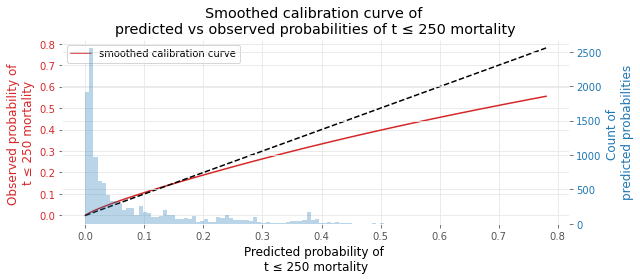

In [40]:
survival_probability_calibration(cph_p01_r1, df_train, t0=250)

ICI =  0.021448201825945666
E50 =  0.0023400561962052535


(<matplotlib.axes._subplots.AxesSubplot at 0x1c58c953a08>,
 0.021448201825945666,
 0.0023400561962052535)

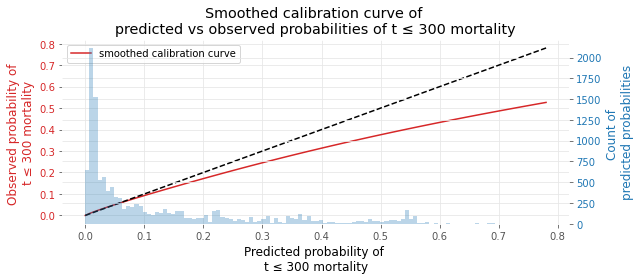

In [41]:
survival_probability_calibration(cph_p01_r1, df_train, t0=300)

ICI =  0.010587172959216946
E50 =  0.007248295812003702


(<matplotlib.axes._subplots.AxesSubplot at 0x1c58e5ae488>,
 0.010587172959216946,
 0.007248295812003702)

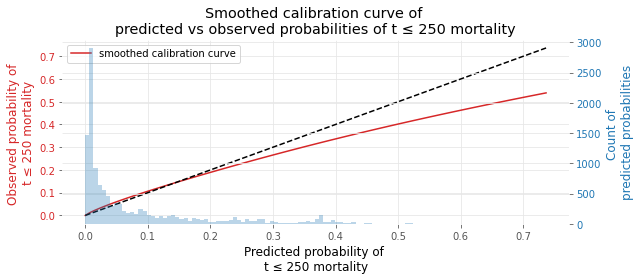

In [42]:
survival_probability_calibration(cph_p01_r05, df_train, t0=250)

ICI =  0.021253164815271883
E50 =  0.002181782292253076


(<matplotlib.axes._subplots.AxesSubplot at 0x1c58e7f9088>,
 0.021253164815271883,
 0.002181782292253076)

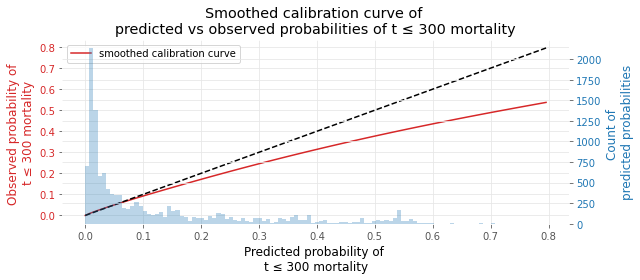

In [43]:
survival_probability_calibration(cph_p01_r05, df_train, t0=300)

We're going to set our penalizer to 0.01 and set L1 equal to 0.5

In [44]:
cph_p01_r05.print_summary()

model,lifelines.CoxPHFitter
duration col,'WEEKS_UMN'
event col,'EVENT_RESIGN'
penalizer,0.01
l1 ratio,0.5
strata,"[PAY_BINS, LOCATION]"
baseline estimation,breslow
number of observations,12305
number of events observed,2021
partial log-likelihood,-11773.04
time fit was run,2020-08-13 04:08:59 UTC


In [45]:
df_cph = df[['EVENT_RESIGN', 'WEEKS_UMN',  'JOB_COUNT',  
             'NUM_RAISES', 'PAY', 'ZDEPTID', 'WKFC_CATGY_DESC', 
             'LOCATION', 'TIME_TO_LST_RAISE']] 

categorical_features = ['WKFC_CATGY_DESC', 'ZDEPT_MEDIAN_BOOL']
df_cph = pay_helper(df_cph, categorical_features)

cph = CoxPHFitter(penalizer=.01, l1_ratio=0.5, strata=['PAY_BINS', 'LOCATION'])
scores = k_fold_cross_validation(fitters=cph, 
                                 df=df_cph, 
                                 duration_col='WEEKS_UMN', 
                                 event_col='EVENT_RESIGN',
                                 k=5, 
                                 scoring_method="concordance_index")
print(scores)

[0.8481048541671892, 0.8330119961074935, 0.8469996264715844, 0.8474640163001034, 0.8412726686533559]


ICI =  0.00803870978332029
E50 =  0.0050869026021646


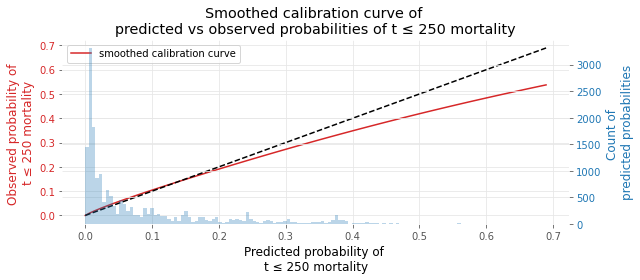

In [46]:
cph_p01_r05 = CoxPHFitter(penalizer=.01, l1_ratio=0.5).fit(
    df=df_cph, 
    duration_col='WEEKS_UMN', 
    event_col='EVENT_RESIGN', 
    show_progress=0, 
    step_size=.05, 
    strata=['PAY_BINS', 'LOCATION'])


survival_probability_calibration(cph_p01_r05, df_cph, t0=250)
plt.savefig('calibration_curve_plot.png', dpi=400)

**Note:** This suggests our model is reasonably well calibrated.

### Predicting Survival Times

#### Get Data

In [47]:
df = load_data()

**Note:** Restarting the kernel to free resources

**Variables: (no significant change)**
- Resignation Events (required) - Did a resignation occur?
- Weeks UMN (required) - How long has/did the individual work at the university?
- Workforce Category Descriptions - What is their job (very roughly)?
- Job Count - How many jobs do they hold?
- Number of Raises - How many raises have they received?
- Pay (binned values) - How much do you earn?
- Work Location - Where do they work?
- Pay Relative to ZDept Median (binary)

**Note:** Within this model, PAY_BINS and LOCATION are incorporated via stratification. This allows us to accomodate non-proportionality within these variables into our Cox model.

In [48]:
df_cph = df[['EVENT_RESIGN', 'WEEKS_UMN', 'JOB_COUNT',  
             'NUM_RAISES', 'PAY', 'ZDEPTID', 'WKFC_CATGY_DESC', 
             'LOCATION', 'TIME_TO_LST_RAISE']] 

categorical_features = ['WKFC_CATGY_DESC', 'ZDEPT_MEDIAN_BOOL']

df_cph = pay_helper(df_cph, categorical_features)

#### Fitting the model

In [49]:
# 0.01 Regularization
cph_p01_r05 = CoxPHFitter(penalizer=.01, l1_ratio=0.5).fit(
    df=df_cph, 
    duration_col='WEEKS_UMN', 
    event_col='EVENT_RESIGN', 
    show_progress=0, 
    step_size=.05, 
    strata=['PAY_BINS', 'LOCATION'])

#### Separating out non-events observations

For our predictions, we will want to create a dataset that removes uncensored values, since we've already observed the survival for those individuals.

In [50]:
# filter down to just censored subjects to predict remaining survival
censored_subjects = df_cph.loc[~df_cph['EVENT_RESIGN'].astype(bool)]
censored_subjects_last_obs = censored_subjects['WEEKS_UMN']

**Note:** We also extract the university tenures associated with each individual to condition our censored data on our actual observations. Stated another way "we scale the original survival function by the survival function at time 𝑠 (everything prior to 𝑠 should be mapped to 1.0 as well, since we are working with probabilities and we know that the subject was alive before 𝑠)."

**In technical terms:**

A common use case is to predict the event time of censored subjects. This is easy to do, but we first have to calculate an important conditional probability. Let 𝑇 be the (random) event time for some subject, and 𝑆(𝑡)≔𝑃(𝑇>𝑡) be their survival function. We are interested in answering the following: What is a subject’s new survival function given I know the subject has lived past time :math:`s`? Mathematically:

𝑃(𝑇>𝑡|𝑇>𝑠)=𝑃(𝑇>𝑡and𝑇>𝑠)𝑃(𝑇>𝑠)=𝑃(𝑇>𝑡)𝑃(𝑇>𝑠)=𝑆(𝑡)𝑆(𝑠)

#### Predicting survival of non-event observations

In [51]:
# Predicting Individual Survival Curves
censored_subjects_survival_functions = cph_p01_r05.predict_survival_function(
    censored_subjects, conditional_after=censored_subjects_last_obs)

# predict median remaining life
censored_subjects_median_survival = cph_p01_r05.predict_median(
    censored_subjects, conditional_after=censored_subjects_last_obs)

**What is a median survival prediction?** 

The median survival function allows us to use individual-level covariates to predict the median lifetimes of an individual. In this context the median represents the number of weeks (tenure) where the employee has a 50% likelihood of resigning. 

#### Median Survival Times

In [52]:
cens_medians = pd.DataFrame(censored_subjects_median_survival)

individual_partial_hazards = cph_p01_r0.predict_partial_hazard(censored_subjects)
cens_medians['partial_hazards'] = individual_partial_hazards

In [53]:
med_list = list(cens_medians[cens_medians[0.5] != np.inf].index)

dfx = df[['EMPLID', 'EVENT_RESIGN', 'WEEKS_UMN', 'JOB_COUNT', 
         'LOCATION', 'NUM_RAISES', 'TIME_TO_LST_RAISE', 'EMP_CLSS_CD',
         'JOBCD_GRP_CD', 'WKFC_ACTN_RSN_LD', 'WKFC_CATGY_DESC', 'PAY', 
          'ZDEPTID', 'DEPTID', 'JOB_TTL', 'CLLG_ADM_UNT_LD', 'SUP_NUM_RPTS']]

dfx = pay_helper(dfx, ['WKFC_CATGY_DESC', 'ZDEPT_MEDIAN_BOOL'])

censored_individuals = dfx[dfx.index.isin(med_list)]

censored_individuals = pd.merge(censored_individuals, cens_medians, 
                                left_index=True, right_index=True)

**Note:** If the survival curve of an individual does not cross 0.5, then the result is infinity. For this reason, we will drop those values for the time being to produce our prediction data set. Since we are using a conditional probability, if the result of predict_median is 10.5, then the entire lifetime is 10.5 + conditional_after.

In [54]:
#### Exploring the Prediction Data

In [55]:
censored_individuals[0.5].describe()

count    3856.000000
mean      521.599252
std       373.902346
min         8.857143
25%       258.928571
50%       393.071429
75%       657.000000
max      2130.142857
Name: 0.5, dtype: float64

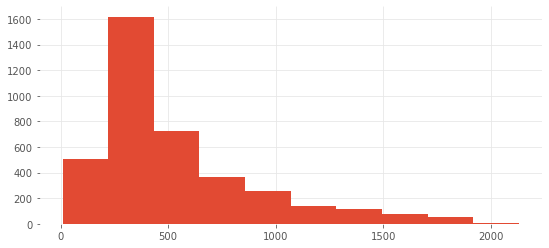

In [56]:
censored_individuals[0.5].hist()

This suggests there are about 20-80 individuals with a relatively short amount of time remaining. Referring back to our calibration curve, we know that a very small number of individuals are likely to expire at or before 250 weeks. We also know that our model is biased towards assigning a higher probability of churn. So, we should exercise some caution.

#### Extracting "High Risk Individuals"

In [57]:
def get_high_risk(df_in, percentile_in):
    df_in = df_in[df_in[0.5] <=  np.percentile(df_in[0.5], percentile_in)]
    return df_in

Here we're pulling the top 10 percent

In [58]:
data_out = get_high_risk(censored_individuals, 10).sort_values([0.5])

In [59]:
data_out[['EMPLID', 'LOCATION', 'EMP_CLSS_CD', 'WKFC_ACTN_RSN_LD', 0.5, 'partial_hazards', 
         'DEPTID', 'JOB_TTL', 'CLLG_ADM_UNT_LD']]

,EMPLID,LOCATION,EMP_CLSS_CD,WKFC_ACTN_RSN_LD,0.5,partial_hazards,DEPTID,JOB_TTL,CLLG_ADM_UNT_LD
4699,724371,TCEASTBANK,ACA,Retirement,8.857143,0.453558,10237,U of MN Foundation VP,"UNIVERSITY RELATIONS, OFC OF"
6621,3583275,TCEASTBANK,ACP,End of Appointment,73.000000,8.607605,10197,Assistant Coach,INTERCOLLEGIATE ATHLETICS
136,5150754,CHANHASSEN,CVL,Rehire after 30 Days,80.714286,3.757978,11050,CO Pro 1-Bookstore Svcs,"FOOD, AGRI/NAT RSRC SCI, COLL"
6595,4868112,TCEASTBANK,CVL,Position Data Update,82.142857,9.638957,10194,Athl Pro 1-Ticket Sls/Svc,INTERCOLLEGIATE ATHLETICS
5597,4978498,TCEASTBANK,CVL,Position Data Update,84.142857,9.638957,10138,Rec Pro 2-Fit/Wellness,"STUDENT AFFAIRS, VICE PROVOST"
6850,5109723,TCEASTBANK,ACP,End of Appointment,87.142857,8.940762,10189,Assistant Athletic Trainer,INTERCOLLEGIATE ATHLETICS
4932,4861895,TCEASTBANK,CVL,Position Data Update,93.857143,7.918849,10237,M&C Pro 1-Social Media,"UNIVERSITY RELATIONS, OFC OF"
11808,3528268,TCEASTBANK,CVL,Benefits Use Only,96.857143,7.048941,11823,Allied Health Care Prof 2,MEDICAL SCHOOL - TC CAMPUS
17072,4569739,ROCHESTER,ACP,NonRenew W Notice Prd End Date,99.571429,2.719497,10712,Teaching Specialist,UMR CHANCELLOR'S OFC
10329,868240,TCEASTBANK,CVL,End of Appointment,100.142857,7.095359,10159,Communications Associate,UNDERGRADUATE EDUCATION


In [60]:
get_high_risk(censored_individuals, 5).describe()

,EMPLID,EVENT_RESIGN,WEEKS_UMN,JOB_COUNT,NUM_RAISES,TIME_TO_LST_RAISE,DEPTID,SUP_NUM_RPTS,WKFC_CATGY_DESC_Athletics,WKFC_CATGY_DESC_Audit,WKFC_CATGY_DESC_Building and Grounds,WKFC_CATGY_DESC_Clerical Support,WKFC_CATGY_DESC_Communications,WKFC_CATGY_DESC_Coordinators,WKFC_CATGY_DESC_Direct Instruction,WKFC_CATGY_DESC_Direct Research,WKFC_CATGY_DESC_Executive Leadership,WKFC_CATGY_DESC_Extension Educators,WKFC_CATGY_DESC_Facilities Related,WKFC_CATGY_DESC_Facility Operations Supervisor,WKFC_CATGY_DESC_Finance and Purchasing,WKFC_CATGY_DESC_Health Sciences Support,WKFC_CATGY_DESC_Human Resources,WKFC_CATGY_DESC_Info Tech,WKFC_CATGY_DESC_Legal,WKFC_CATGY_DESC_Mission Support,WKFC_CATGY_DESC_Other,WKFC_CATGY_DESC_Police/Security,WKFC_CATGY_DESC_Service and Maintenance,WKFC_CATGY_DESC_Skilled Generalists,WKFC_CATGY_DESC_Skilled Trades,WKFC_CATGY_DESC_Student Services,ZDEPT_MEDIAN_BOOL_1,0.5,partial_hazards
count,1.940000e+02,194.0,194.000000,194.0,194.000000,194.000000,194.000000,194.000000,194.000000,194.0,194.0,194.0,194.000000,194.0,194.000000,194.000000,194.000000,194.000000,194.0,194.0,194.0,194.000000,194.000000,194.000000,194.0,194.000000,194.0,194.0,194.000000,194.000000,194.0,194.000000,194.000000,194.000000,194.000000
mean,4.539120e+06,0.0,237.326951,1.0,0.025773,114.082474,11217.046392,8.837629,0.036082,0.0,0.0,0.0,0.051546,0.0,0.005155,0.376289,0.005155,0.041237,0.0,0.0,0.0,0.067010,0.005155,0.036082,0.0,0.273196,0.0,0.0,0.015464,0.005155,0.0,0.082474,0.010309,124.106775,6.033017
std,1.053397e+06,0.0,63.945654,0.0,0.237333,102.356733,565.045491,10.137433,0.186978,0.0,0.0,0.0,0.221681,0.0,0.071796,0.485707,0.071796,0.199353,0.0,0.0,0.0,0.250687,0.071796,0.186978,0.0,0.446754,0.0,0.0,0.123708,0.071796,0.0,0.275798,0.101271,16.171789,0.989152
min,7.243710e+05,0.0,115.142857,1.0,0.000000,0.100000,10016.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,8.857143,0.453558
25%,4.224936e+06,0.0,195.000000,1.0,0.000000,37.350000,10951.500000,3.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,117.000000,5.661895
50%,4.841046e+06,0.0,228.714286,1.0,0.000000,53.050000,11328.000000,6.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,124.428571,5.969830
75%,5.113256e+06,0.0,269.142857,1.0,0.000000,209.350000,11713.000000,10.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,134.928571,6.334199
max,8.005462e+06,0.0,718.142857,1.0,3.000000,465.700000,12217.000000,78.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,150.000000,9.638957


### Plotting Higher Risk Individuals

In [61]:
high_risk_data = censored_subjects_survival_functions[
    get_high_risk(censored_individuals, 5).index]

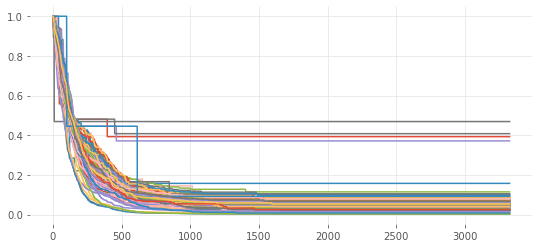

In [62]:
high_risk_data.plot(legend=False)
plt.savefig('high_risk_data_plot.png', dpi=400)

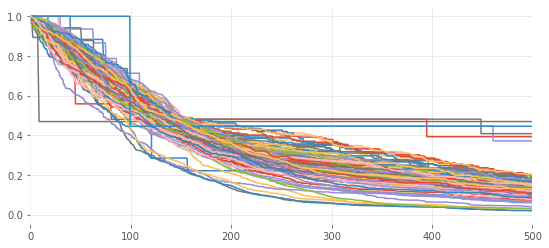

In [63]:
high_risk_data.plot(legend=False, xlim=(0, 500))
plt.savefig('high_risk_data_plot2.png', dpi=400)

### Overview of high risk individuals

In [64]:
high_risk_data2 = get_high_risk(censored_individuals, 5)

In [65]:
high_risk_data2.groupby(['LOCATION']).count()['EMPLID']

LOCATION
CHANHASSEN      4
CROOKSTON       2
DULUTH          2
ROCHESTER       1
STPAUL         46
TCEASTBANK    122
TCWESTBANK     17
Name: EMPLID, dtype: int64

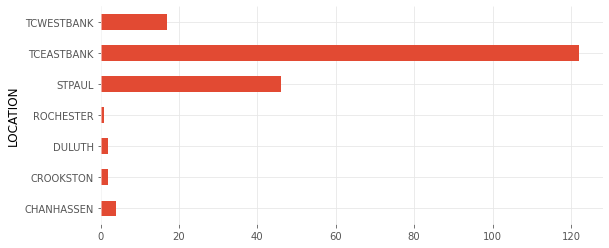

In [66]:
high_risk_data2.groupby(['LOCATION']).count()['EMPLID'].plot.barh()

In [67]:
high_risk_data2.groupby(['EMP_CLSS_CD']).count()['EMPLID']

EMP_CLSS_CD
ACA      2
ACP     16
CVL    143
LRC      3
LRH      3
LRS      6
LRT     16
PDO      5
Name: EMPLID, dtype: int64

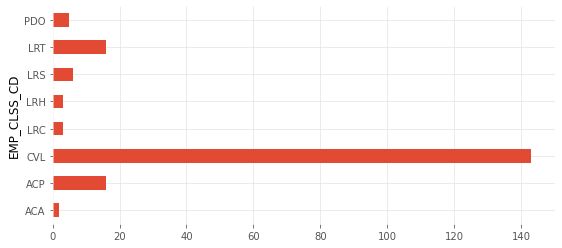

In [68]:
high_risk_data2.groupby(['EMP_CLSS_CD']).count()['EMPLID'].plot.barh()

In [69]:
high_risk_data2.groupby(['JOBCD_GRP_CD']).count()['EMPLID']

JOBCD_GRP_CD
AA      2
AP     21
CS    143
LR     28
Name: EMPLID, dtype: int64

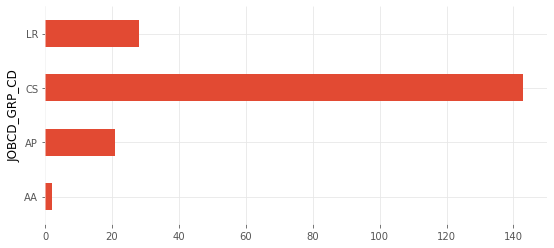

In [70]:
high_risk_data2.groupby(['JOBCD_GRP_CD']).count()['EMPLID'].plot.barh()

In [71]:
high_risk_data2.groupby(['WKFC_ACTN_RSN_LD']).count()['EMPLID']

WKFC_ACTN_RSN_LD
Additional Job                     1
Benefits Use Only                  8
Contract                           1
End of Appointment                47
Failed Prob/LO List Ineligible    21
Layoff/Ineligible for LO List      2
Layoff/NonRenew Prgm <3yrs Svc     1
Market Adjustment                  2
Merit                              1
NonRenew W Notice Prd End Date     2
Position Data Update              11
Primary Job Change                 1
Rehire after 30 Days              25
Rehire within 30 Days              1
Reports to Change                 13
Retirement                         1
Return From Leave                  2
Special Circumstances             12
Standard Hours Change              8
Step/Progression                   2
Termination for Cause              2
Transfer                          30
Name: EMPLID, dtype: int64

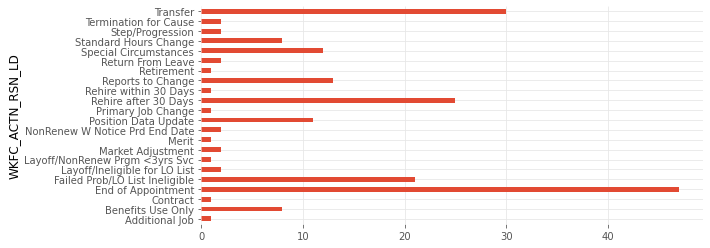

In [72]:
high_risk_data2.groupby(['WKFC_ACTN_RSN_LD']).count()['EMPLID'].plot.barh()

In [73]:
high_risk_data2.groupby(['WKFC_ACTN_RSN_LD', 'JOBCD_GRP_CD']).count()['EMPLID']

WKFC_ACTN_RSN_LD                JOBCD_GRP_CD
Additional Job                  CS               1
Benefits Use Only               CS               8
Contract                        AA               1
End of Appointment              AP              16
                                CS              26
                                LR               5
Failed Prob/LO List Ineligible  CS               9
                                LR              12
Layoff/Ineligible for LO List   CS               2
Layoff/NonRenew Prgm <3yrs Svc  CS               1
Market Adjustment               CS               2
Merit                           AP               1
NonRenew W Notice Prd End Date  AP               2
Position Data Update            CS              11
Primary Job Change              CS               1
Rehire after 30 Days            CS              24
                                LR               1
Rehire within 30 Days           CS               1
Reports to Change               CS   

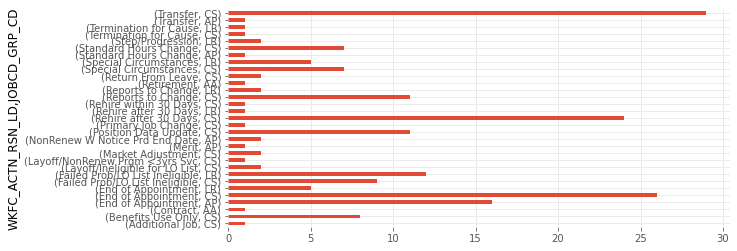

In [74]:
high_risk_data2.groupby(['WKFC_ACTN_RSN_LD', 'JOBCD_GRP_CD']).count()['EMPLID'].plot.barh()

### 6.3.3 Conditional Survival Forest

**What is a random survival forest model?**

Random survival forest (RSF) [22], a non-parametric method for ensemble estimation constructed by bagging of classification trees for survival data, has been proposed as an alternative method for better survival prediction and variable selection. Compared with regression based approaches, random survival forest has several advantages. First, it is completely data driven and thus independent of model assumptions. Second, it seeks a model that best explains the data and thus represents a suitable tool for exploratory analysis where prior information of the survival data is limited. Third, in case of high dimensional data, limitations of univariate regression approaches such as overfitting, unreliable estimation of regression coefficients, inflated standard errors or convergence problems do not apply to random survival forest [23]. Fourth, similar to survival trees, random survival forest is robust to outliers in the covariate space [24].

--https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6364686/

### Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import NelsonAalenFitter
from lifelines.utils import median_survival_times
from lifelines import CoxPHFitter, WeibullAFTFitter
from lifelines.utils import k_fold_cross_validation
from lifelines.calibration import survival_probability_calibration
from lifelines.utils import median_survival_times, qth_survival_times 

from sklearn.model_selection import GridSearchCV
from lifelines.utils.sklearn_adapter import sklearn_adapter
from sklearn.model_selection import train_test_split

from pysurvival.utils.display import correlation_matrix
from pysurvival.models.survival_forest import \
ConditionalSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import integrated_brier_score,\
compare_to_actual, create_risk_groups

# Setting display options
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
plt.rcParams['figure.figsize'] = [9, 4]

import warnings
warnings.filterwarnings("ignore")

For this model, we'll begin by reimporting our data to ensure it's properly formatted. 

### Loading the data

In [4]:
# Read in data
file_directory = 'C:/Users/watki162/Desktop/Survival_Analysis_Work/'
flat_file = 'staff_file.csv'
df = pd.read_csv(file_directory + flat_file, low_memory = 0)
df.drop_duplicates(keep='first', inplace=True)

For this analysis, we must ensure that all of our data has been converted to numeric data. To this end, we'll also dummify Location and Pay Quantiles, since they had previously been incorporated into our model as stratafied variables.

In [5]:
# Filling in NAs
df.NUM_RAISES = df.NUM_RAISES.fillna(0) # Just in case

# Building event categories 
df['EVENT_RESIGN'] = df['WKFC_ACTN_RSN_LD'].apply(
    lambda x: 1 if x == "Resignation" else 0)
    
df['EVENT_RETIRE'] = df['WKFC_ACTN_RSN_LD'].apply(
    lambda x: 1 if x == "Retirement" else 0)

df = df[df.WEEKS_UMN > 0]

In [6]:
df_cph = df[['EVENT_RESIGN', 'WEEKS_UMN', 'JOB_COUNT',  'NUM_RAISES', 'PAY', 
             'WKFC_CATGY_DESC', 'ZDEPTID', 'NUM_SUPS', 'LOCATION', 
             'TIME_TO_LST_RAISE', 'EMP_CLSS_DESC' ]] 

df_cph = pd.get_dummies(df_cph, 
                        prefix=['WKFC_CATGY_DESC', 'LOCATION', 'ZDEPTID', 'EMP_CLSS_DESC'], 
                        columns=['WKFC_CATGY_DESC', 'LOCATION', 'ZDEPTID', 'EMP_CLSS_DESC'], 
                        drop_first=False)

# Creating the features
features = np.setdiff1d(df_cph.columns, ['WEEKS_UMN', 'EVENT_RESIGN'] ).tolist()

Before we continue, we'll want to check for null values and duplicate values.

In [7]:
# Checking for null values
N_null = sum(df_cph[features].isnull().sum())
print(N_null)

0


In [8]:
# Removing duplicates if there exist
N_dupli = sum(df_cph.duplicated(keep='first'))
df_cph = df_cph.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

The dataset contains 39 duplicates


In [9]:
N = df_cph.shape[0]
print(N)

17547


#### Split Train Test

In [10]:
# Building training and testing sets #
df_train, df_test = train_test_split(df_cph, test_size=.3, random_state=42)

# Creating the X, T and E inputs
X_train, X_test = df_train[features], df_test[features]
T_train, T_test = df_train['WEEKS_UMN'], df_test['WEEKS_UMN']
E_train, E_test = df_train['EVENT_RESIGN'], df_test['EVENT_RESIGN']

#### Fitting the Model 

In [11]:
csf = ConditionalSurvivalForestModel(num_trees=200)
csf.fit(X_train, T_train, E_train, max_features='sqrt',
        alpha=0.05, minprop=0.1, max_depth=5, min_node_size=30)

ConditionalSurvivalForestModel

In [12]:
c_index = concordance_index(csf, X_test, T_test, E_test)
print('C-index: {:.2f}'.format(c_index))

C-index: 0.85


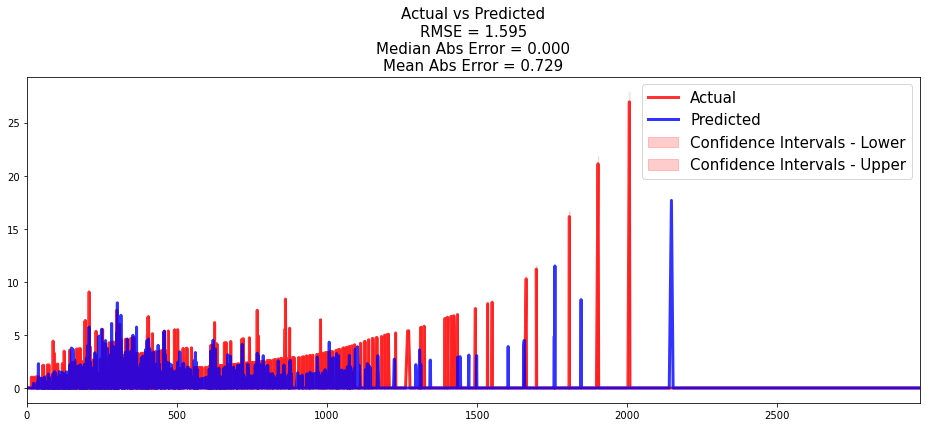

In [13]:
results = compare_to_actual(csf, X_test, T_test, E_test,
                            is_at_risk = False,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])

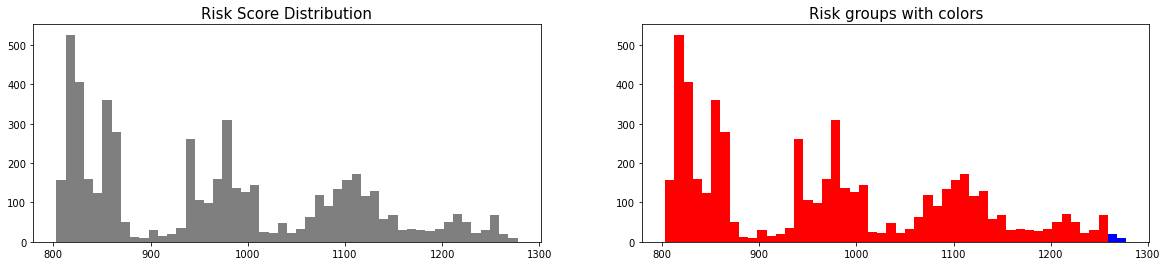

In [14]:
risk_groups = create_risk_groups(model=csf, X=X_test,
    use_log = False, num_bins=50, figure_size=(20, 4),
    low= {'lower_bound':700, 'upper_bound':1250, 'color':'red'},
    high= {'lower_bound':1250, 'upper_bound':1500, 'color':'blue'})

#### Checking Variable Importances

In [15]:
csf.variable_importance_table.head(10)

,feature,importance,pct_importance
0,NUM_RAISES,3.702037,0.122281
1,TIME_TO_LST_RAISE,3.697584,0.122134
2,NUM_SUPS,3.242988,0.107118
3,PAY,3.027661,0.100006
4,EMP_CLSS_DESC_Academic Administrative,2.455354,0.081102
5,WKFC_CATGY_DESC_Mission Support,2.184028,0.072140
6,WKFC_CATGY_DESC_Direct Research,2.183438,0.072121
7,EMP_CLSS_DESC_Civil Service,1.978086,0.065338
8,LOCATION_TCEASTBANK,1.518278,0.050150
9,LOCATION_STPAUL,1.243030,0.041058


The full data set is too large, so we're going to use downsampling

#### Predicting risk scores

In [16]:
# Downsampling to avoid memory issues. The training on the entire data set 
# can more than 16 Gb of Memory
df_cph2 = df_cph.sample(frac=.5, random_state=42)

In [17]:
# Creating the X, T and E inputs
X = df_cph2[features]
T = df_cph2['WEEKS_UMN']
E = df_cph2['EVENT_RESIGN']

In [18]:
# Fitting the model
csf = ConditionalSurvivalForestModel(num_trees=200)
csf.fit(X, T, E, max_features='sqrt',
        alpha=0.05, minprop=0.1, max_depth=5, min_node_size=30)

ConditionalSurvivalForestModel

In [19]:
c_index = concordance_index(csf, X, T, E)
print('C-index: {:.2f}'.format(c_index))

C-index: 0.84


#### Prediction w/ Sample Dataset

In [20]:
df_csf = df_cph2[df_cph2['EVENT_RESIGN'] == 0]

In [21]:
# Predicting on non-event individuals
predicted_risk = csf.predict_risk(df_csf)

In [22]:
# Predicting on non-event individuals
predicted_survival = csf.predict_survival(df_csf)

In [23]:
# Predicting on non-event individuals
predicted_hazard = csf.predict_hazard(df_csf)

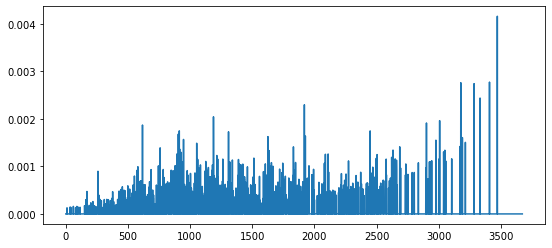

In [24]:
pd.DataFrame(predicted_hazard).transpose().loc[:,1].plot()

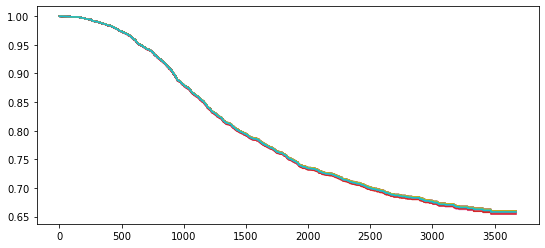

In [25]:
pd.DataFrame(predicted_survival).transpose().loc[:,1:100].plot(legend=False)

In [26]:
df_csf['predicted_risk'] = predicted_risk

#### Save predictions

In [27]:
#df_csf.to_csv('C:/Users/watki162/Desktop/Survival_Analysis_Work/' + \
#                'model_results/csf_predictions_staff.csv')

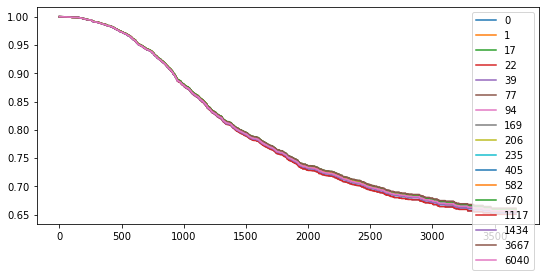

In [28]:
pd.DataFrame(predicted_survival).drop_duplicates().transpose().plot()
plt.savefig('csf_high_risk_data_plot.png', dpi=400)

### Predicting Survival

In [29]:
# Building training and testing sets #
df_train, df_test = train_test_split(df_cph, test_size=.1, random_state=42)

# Creating the X, T and E inputs
X_train, X_test = df_train[features], df_test[features]
T_train, T_test = df_train['WEEKS_UMN'], df_test['WEEKS_UMN']
E_train, E_test = df_train['EVENT_RESIGN'], df_test['EVENT_RESIGN']

In [30]:
# Fitting the model
csf = ConditionalSurvivalForestModel(num_trees=200)
csf.fit(X_train, T_train, E_train, max_features='sqrt',
        alpha=0.05, minprop=0.1, max_depth=5, min_node_size=30)

ConditionalSurvivalForestModel

In [31]:
# Predicting on non-event individuals
predicted_survival = csf.predict_survival(df_csf)

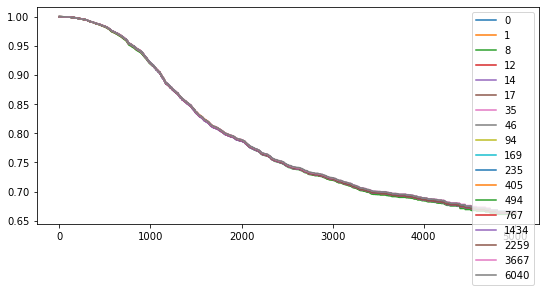

In [32]:
pd.DataFrame(predicted_survival).drop_duplicates().transpose().plot()
plt.savefig('csf_high_risk_data_plot2.png', dpi=400)

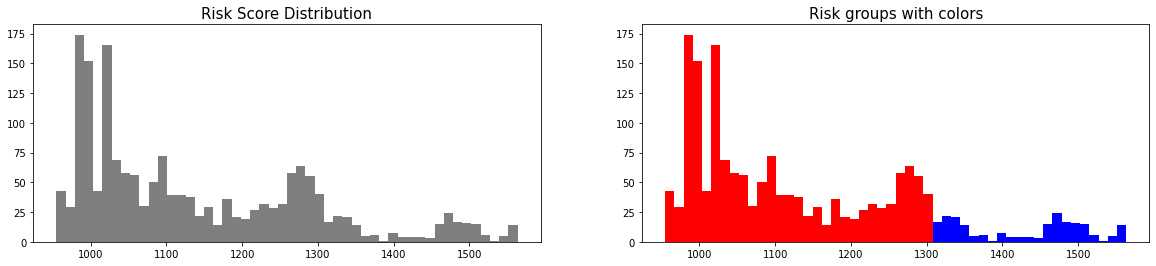

In [34]:
risk_groups = create_risk_groups(model=csf, X=X_test,
    use_log = False, num_bins=50, figure_size=(20, 4),
    low= {'lower_bound':700, 'upper_bound':1300, 'color':'red'},
    high= {'lower_bound':1300, 'upper_bound':1700, 'color':'blue'})

In [35]:
df[df.index.isin(risk_groups['high'][1])]

,Unnamed: 0,EMPLID,ORIG_HIRE_DT,UNIV_STRT_DT,POS_ENTR_DT,DEPT_ENTR_DT,JOB_CD_STRT_DT,UNIV_TRMN_DT,LST_RAISE_DT,EMP_STS_CD,EMP_STS_DESC,WKFC_ACTN_RSN_LD,POS_NBR,POS_TTL,JOB_CD,JOB_TTL,JOB_CATGY_DESC,JOBCD_GRP_CD,JOBCD_GRP_DESC,WKFC_CATGY_CD,WKFC_CATGY_DESC,EMP_CLSS_CD,EMP_CLSS_DESC,TENURE_FLG,TENURE_TRK_FLG,RPT_TO_EMPLID,RPT_TO_FULL_NM_TXT,RPT_TO_POS,RPT_TO_TTL,DEPTID,DEPTID_LD,ZDEPTID,ZDEPTID_LD,CLLG_ADM_UNT_CD,CLLG_ADM_UNT_LD,VP_ADM_UNT_CD,VP_ADM_UNT_LD,CMP_LD,LOCATION,DEPT_SIZE,NUM_SUPS,DAYS_SUP_CHG,SUP_NUM_RPTS,MULTI_JOB_IND,JOB_COUNT,PAY,NUM_RAISES,TIME_TO_LST_RAISE,MID_PAY,PAY_ABOVE_MID,WEEKS_JOBCODE,WEEKS_POS,WEEKS_DEPT,WEEKS_UMN,TENURE,TARGET,EVENT_RESIGN,EVENT_RETIRE
6,18,936507,2007-06-11,2009-11-09,2010-08-30,2010-08-30,2010-08-30,NaN,2019-08-26,W,Short Work Break,Break Between Appointment,226468,Lecturer,9753,Lecturer,P&A,AP,Academic Professional,UM03,Direct Instruction,ACP,Academic Professional,N,N,2476764,"Bartlett,Kenneth Russell",289210,Chair (With Faculty Rank),11207,"Org Leadership, Policy & Dev",Z0172,"CEHD Org Leadership,Policy/Dev",TCED,"EDUCATION & HUMAN DEVEL, COLL",TEVP,"ACADEMIC AFFAIRS/PROVOST,SR VP",TWIN CITIES,TCEASTBANK,57,2,1590.0,47.0,0.0,1,82463.45000,5.0,40.1,61528.050000,1,509.142857,509.142857,509.142857,551.142857,0,0,0,0
9,22,1123646,2015-08-31,2015-08-31,2015-08-31,2015-08-31,2015-08-31,NaN,2019-06-10,A,Active,Merit,254351,Lecturer,9753,Lecturer,P&A,AP,Academic Professional,UM03,Direct Instruction,ACP,Academic Professional,N,N,2476764,"Bartlett,Kenneth Russell",289210,Chair (With Faculty Rank),11207,"Org Leadership, Policy & Dev",Z0172,"CEHD Org Leadership,Policy/Dev",TCED,"EDUCATION & HUMAN DEVEL, COLL",TEVP,"ACADEMIC AFFAIRS/PROVOST,SR VP",TWIN CITIES,TCEASTBANK,57,2,1590.0,47.0,0.0,1,86091.10000,4.0,51.1,61528.050000,1,248.142857,248.142857,248.142857,248.142857,0,0,0,0
11,25,1503357,2002-08-12,2002-08-12,2014-01-13,2016-07-01,2018-09-10,NaN,2019-06-10,A,Active,Merit,263287,Senior Lecturer,9770,Senior Lecturer,P&A,AP,Academic Professional,UM03,Direct Instruction,ACP,Academic Professional,N,N,2476764,"Bartlett,Kenneth Russell",289210,Chair (With Faculty Rank),11207,"Org Leadership, Policy & Dev",Z0172,"CEHD Org Leadership,Policy/Dev",TCED,"EDUCATION & HUMAN DEVEL, COLL",TEVP,"ACADEMIC AFFAIRS/PROVOST,SR VP",TWIN CITIES,TCEASTBANK,57,2,631.0,47.0,0.0,1,69329.37000,5.0,51.1,69164.685000,1,90.142857,333.142857,204.571429,929.142857,0,0,0,0
24,53,3815632,2008-03-07,2016-10-24,2019-12-16,2019-12-16,2019-05-30,NaN,2019-12-23,A,Active,Annual Increase,308128,Executive Ofc and Admin Spec,1885,Executive Ofc and Admin Spec,Labor Represented,LR,Labor Represented,UM15,Clerical Support,LRC,LR - Clerical,N,N,2476764,"Bartlett,Kenneth Russell",289210,Chair (With Faculty Rank),11207,"Org Leadership, Policy & Dev",Z0172,"CEHD Org Leadership,Policy/Dev",TCED,"EDUCATION & HUMAN DEVEL, COLL",TEVP,"ACADEMIC AFFAIRS/PROVOST,SR VP",TWIN CITIES,TCEASTBANK,57,4,484.0,47.0,0.0,1,50107.20000,3.0,23.1,48214.400000,1,52.714286,24.142857,24.142857,188.142857,0,0,0,0
25,56,4018300,2008-07-23,2008-07-23,2010-07-06,2010-07-06,2015-06-01,NaN,2019-06-10,A,Active,Merit,226501,Student Services Prof 3,9764P3,Student Services Prof 3,P&A,AP,Academic Professional,UM13,Student Services,ACP,Academic Professional,N,N,2476764,"Bartlett,Kenneth Russell",289210,Chair (With Faculty Rank),11207,"Org Leadership, Policy & Dev",Z0172,"CEHD Org Leadership,Policy/Dev",TCED,"EDUCATION & HUMAN DEVEL, COLL",TEVP,"ACADEMIC AFFAIRS/PROVOST,SR VP",TWIN CITIES,TCEASTBANK,57,2,1590.0,47.0,0.0,1,73505.66000,3.0,51.1,53000.000000,1,261.142857,517.000000,517.000000,618.857143,0,0,0,0
27,59,4448631,2011-08-29,2015-08-31,2015-08-31,2014-08-25,2015-08-31,2016-07-01,NaN,T,Terminated,Resignation,268893,Business Dev Professional 4,8317D4,Business Dev Professional 4,Civil Service,CS,Civil Service,UM12,Mission Support,CVL,Civil Service,N,N,3473481,"Weerts,David J",226451,Associate Professor,11207,"Org Leadership, Policy & Dev",Z0172,"CEHD Org Leadership,Policy/

In [36]:
df[df.index.isin(risk_groups['high'][1])].EVENT_RESIGN.sum() / \
df[df.index.isin(risk_groups['high'][1])].EVENT_RESIGN.count() 

0.16475095785440613

In [37]:
df[df.index.isin(risk_groups['low'][1])].EVENT_RESIGN.sum() / \
df[df.index.isin(risk_groups['low'][1])].EVENT_RESIGN.count() 

0.14926372155287818

## 7.  Final Output, Table and Loading into Tableau Dashboard

### 7.1 Final Data Format

The output of the final classification model (as detailed in previous sections) was joined to the employee dimension table, and the following data points were extracted to form the final data set for the Tableau dashboard:

*From the Employee dimnesion:*

- EMPLID (Employee ID)
- FST_NM_TXT (First Name)
- LST_NM_TXT (Last Name)
- RPT_TO_EMPLID (Supervisor ID)
- RPT_TO_TTL (Supervisor Title)
- RPT_TO_FULL_NM_TXT (Supervisor Name)
- POS_TTL (Position Title)
- POS_ENTR_DT (Position Start Date)
- ORIG_HIRE_DT (Hire Date)
- UNIV_STRT_DT (UM Start Date)
- DEPTID (Department ID)
- DEPT_NM (Department Name)
- ZDEPTID 
- ZDEPTID_LD (ZDEPT Name)
- CLLG_ADM_UNT_LD (College Admin Unit Name)
- CMP_LD (Campus)

*From Time-to-Event Model output:*

- Partial hazards
- Rank (based on partial hazards)
- Risk Level (calculated based on the thresholds chosen by OHR)

This data set was saved as a flat file, which was then loaded into a Tableau workbook to create the turnover dashboard.

### 7.2 Tableau Dashboard

<img src="TableauMockup.png"> [Credit: *CAL Team 1 Final Presentation*]

The dashboard consists of summary metrics at the top of the dashboard, an employee table below, and filters on the right side. Changing the filters will change the information in both the employee table and the summary metrics, and offer a flexible interface for users to customize the view to fit their needs.

### 7.3 Future enhancements/considerations for Tableau report

The output of the model and the final data set as detailed in section 7.1 could be configured to automatically write data into a SQL table. This has many advantages over using flat files: 

(1) it is more difficult to accidentally delete and/or overwrite data,  
(2) data storage and retrieval is more efficient,  
(3) SQL databases offer robust data integrity checks and management,  
(4) rows may be timestamped when written into the table, offering a historical record,  
(5) SQL databases offer security on who may access the data, whereas it is more difficult to set security for network locations and flat files,  
(6) the Tableau dashboard can be configured to update automatically using a custom SQL query to access the predictions.  

Additionally, it may be beneficial to add information about when the predictions were generated to the Tableau dashboard (prediction refresh date).

## 8.  Future Improvements & Next Steps

### 8.1 Limitations

There are many additional reasons that may drive employees to quit, that we can’t observe and therefore our model can’t capture. (For example, a spouse accepting a job out of state)

Predictive models rely solely and completely on historical record. Future shifts in behavior will require model retraining.

Any model is a best guess and should be used as an additional data point rather than the final word.

### 8.2  Future Enhancements

Due to privacy constraints, many key data points were not available to our team to use in the models. We believe that adding these to the models will boost performance.

- Age & other demographic information
- Education level and field of study
- Employee zip code (daily commute distance)
- Previous employment history (scraping of web data)

More sophisticated data mining and machine learning techniques can be applied to the data set given increased computational resources.

### 8.3 Next Steps

The tools and environment for replication and enhancement of this project are already available to OHR. OHR will need to allocate the appropriate resources for creation, deployment, and maintenance of the classification and time-to-event models.  Consult internal teams on exact technology integration prior to further deployment of infrastructure and the models.

## 9.  Appendices

(1) **OHR_Table_Generation_All_Time.ipynb**
    - Generates a "flattened" table using the entire five year history
(2) **OHR_Table_Generation_Feature_Engineering.ipynb**
    - Generates a "flattened" table within a select window
(3) **CR-table-generation.ipynb**
    - Final table creation notebook (prepackaged Python modules)
   
(4) **OHR_Professional_Staff_Classifier_Final.ipynb**
    - Pulls in the "flattened" data set, creates a Pipeline for classification, generates and runs through seven different algorithms, and performs model evaluations for Professional Staff using the entire five-year history

(5) **OHR_Faculty_Classifier_Final.ipynb**
    - Pulls in the "flattened" data set, creates a Pipeline for classification, generates and runs through seven different algorithms, and performs model evaluations for Faculty using the entire five-year history

(6) **CR-Staff-Modeling.ipynb**
    - Pulls in training data & testing data, performs encoding, value imputation, upsampling and downsampling, classification modeling and predictions on six month windows using different probability thresholds
    

## 10.  References

[1]  Angell, Zach.  (2019, January 22).  Modeling Customer Churn With Survival Analysis.  <i>Medium</i>.  Retreived from https://medium.com/@zachary.james.angell/applying-survival-analysis-to-customer-churn-40b5a809b05a

[2]  Kurita, Keita.  (2018, January 5).  LightGBM and XGBoost Explained.  <i>ML Explained</i>.  Retreived from https://mlexplained.com/2018/01/05/lightgbm-and-xgboost-explained/#:~:text=The%20level%2Dwise%20strategy%20maintains,reduces%20the%20loss%20the%20most.&text=Level%2Dwise%20training%20can%20be,the%20opposite%20does%20not%20hold.

[3]  Pedregosa et al. (2011).  Scikit-learn: Machine Learning in Python.  <i>Journal of Machine Learning Research</i>.  Retreived from https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

[4]  Radewagen, Rick & Wu, Ye.  (2017, June 7).  7 Techniques to Handle Imbalanced Data.  <i>KDnuggets</i>.  Retreived from https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

[5]  Riso, Rebecca.  (2019, March 27).  Imbalanced Classes: Part 2; Avoiding Imbalanced Class Pitfalls in Classification.  <i>Towards Data Science</i>.  Retreived from https://towardsdatascience.com/imbalanced-class-sizes-and-classification-models-a-cautionary-tale-part-2-cf371500d1b3

[6]  Sehra, Chirag.  (2018, January 19).  Decision Trees Explained Easily.  <i>Medium</i>.  Retreived from https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248#:~:text=Decision%20tree%20builds%20classification%20or,decision%20nodes%20and%20leaf%20nodes.

[7]  Sundmark, Lyndon.  (2016, September 6).  A Tutorial on People Analytics Using R - Employee Churn.  <i>AIHR</i>.  Retreived from https://www.analyticsinhr.com/blog/tutorial-people-analytics-r-employee-churn/

[8]  Zhao, Yue & Hryniewicki, Maciej & Cheng, Francesca & Fu, Boyang & Zhu, Xiaoyu. (2019). Employee Turnover Prediction with Machine Learning: A Reliable Approach.  <i>Intelligent Systems and Applications (IntelliSys)</i>.  Retreived from https://www.researchgate.net/publication/328796091_Employee_Turnover_Prediction_with_Machine_Learning_A_Reliable_Approach